In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
#plotting funtion - it takes the entire data and plots the points with label - 1 and label-0 separately
#it also plots the data through scatter plots
def plot_f(data,labels,title,x,y):
    plt.figure(figsize = (14,9))
    P = []
    Q = []
    for i in range(0,len(data)):
        list = []
        if(labels[i] == 1):
            list.append(data[i][0])
            list.append(data[i][1])
            P.append(list)
        else :
            list.append(data[i][0])
            list.append(data[i][1])
            Q.append(list)
    P=torch.tensor(P)
    Q=torch.tensor(Q)
    plt.plot(x,y,'-r',label = 'W')
    plt.scatter(P[:,0],P[:,1],s=3)
    plt.scatter(Q[:,0],Q[:,1],s=3)
    plt.title(title)
    plt.grid()
    plt.show()

In [3]:
#function for perceptron training 
def train_perceptron(x, y, w, nb_epochs_max,n_updates):  
    for e in range(0,nb_epochs_max):
        nb_changes = 0
        for i in range(x.size(0)):
            if (x[i][0]*w[0]+x[i][1]*w[1]+x[0][2]*w[2])*y[i] <= 0:
                w = w + y[i]*x[i]
                nb_changes = nb_changes + 1
                n_updates = n_updates + 1
        if nb_changes == 0:
            print('Early stopping at epoch number %d',e) 
            break;
    return w,n_updates

In [4]:
#the line I considered to generate data
class Generate_line:
    a = 0 
    b = 0
    c = 0
    def __init__(self,array):
        self.a = array[0]
        self.b = array[1]
        self.c = array[2]


In [5]:
#generate line randomly
torch.manual_seed(20)
a = torch.randint(1,5,(1,))
b = torch.randint(1,5,(1,))
c = torch.randint(-50,-45,(1,))
my_tensor = torch.tensor([a,b,c])
my_line = Generate_line(my_tensor)
my_tensor

tensor([  4,   3, -48])

In [6]:
# create data function - it generates 3000 points between 0 and 1 and scales it to 15 so that points lie between 0 and 15
#then it removes the points which are less than gamma distance from my_line.
def create_data(gamma):
    data = torch.rand(3000,2)*20
    denom = torch.sqrt((my_line.a)**2+(my_line.b)**2)
    count = 0 #counts the number of points which are not removed 
    X=torch.empty(3000,3).fill_(1)
    X_new=torch.empty(3000,3).fill_(1)#takes all the points in X which are not removed
    Y=torch.ones(3000,1).fill_(1)# takes all the labels of the points in X which are not removed
    X[:,:2]=data
    for i in range(0,3000):
        val = my_line.c + my_line.a*data[i][0] + my_line.b*data[i][1]
        if val/denom > gamma:
            X_new[count][0] = X[i][0]
            X_new[count][1] = X[i][1]
            Y[count][0] = 1
            count = count+1
        elif val/denom < -gamma:
            X_new[count][0] = X[i][0]
            X_new[count][1] = X[i][1]
            Y[count][0] = -1
            count = count+1
    X = torch.tensor
    X = X_new[:count,:]#taking the points in X_new till count because X_new has extra tensor[1,1,1] elements
    Y = Y[:count]#taking the points in Y till count because X_new has extra tensor[1] elements
    plot_f(X,Y,'Data points',[],[])
    W = torch.zeros(X.size(1))#initializing the weight as zeros
    plot_f(X,Y,'Graph of W before training',np.linspace(0,22,100),np.zeros(100,))
    return X,Y,W


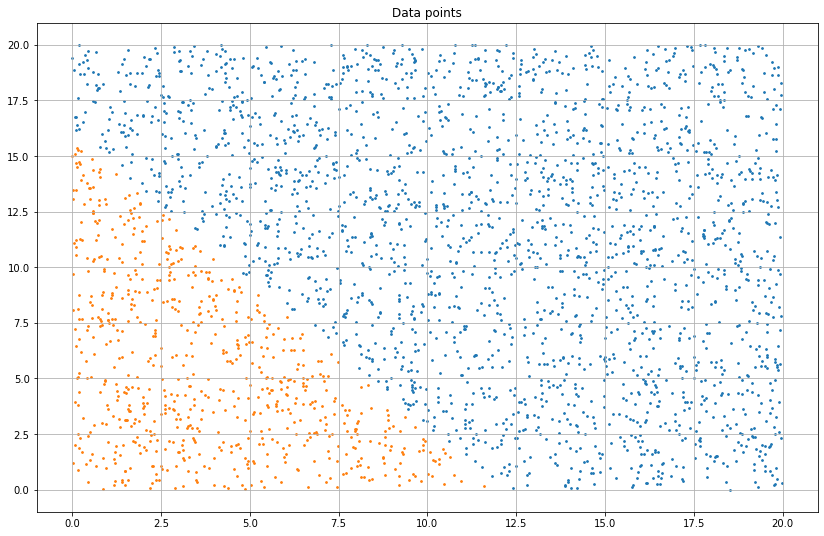

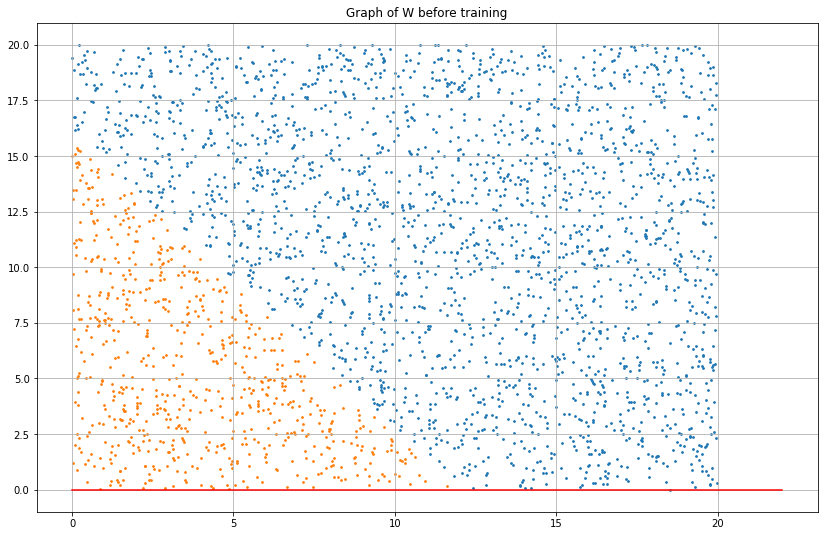

Early stopping at epoch number %d 4


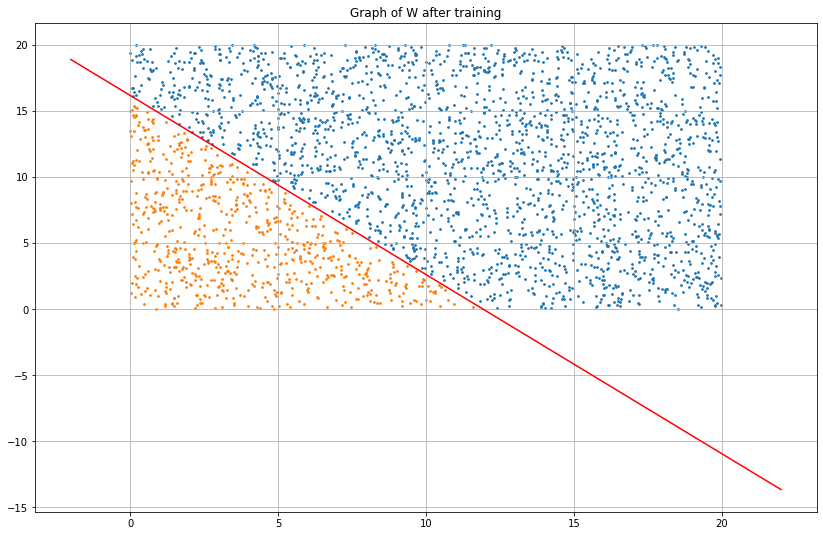

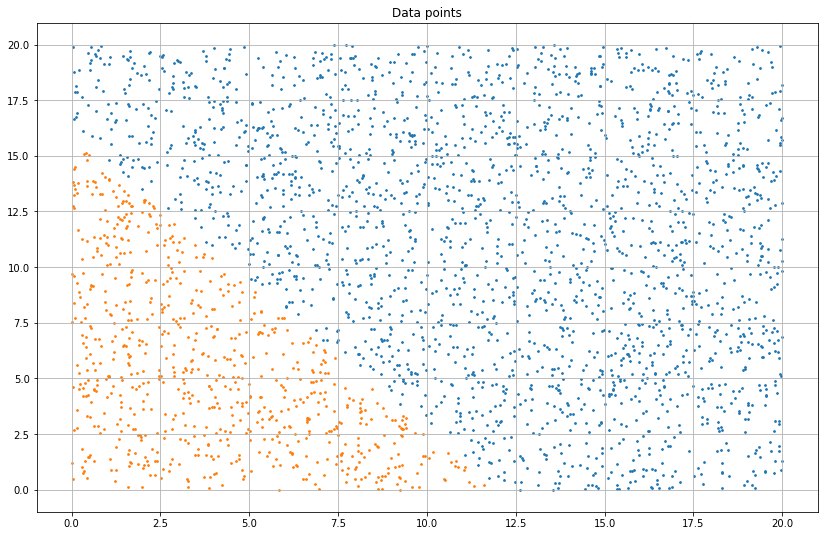

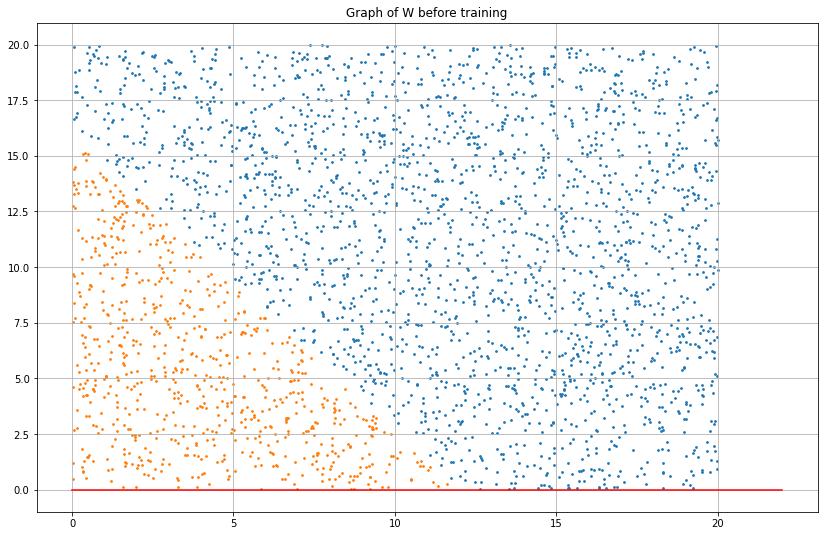

Early stopping at epoch number %d 3


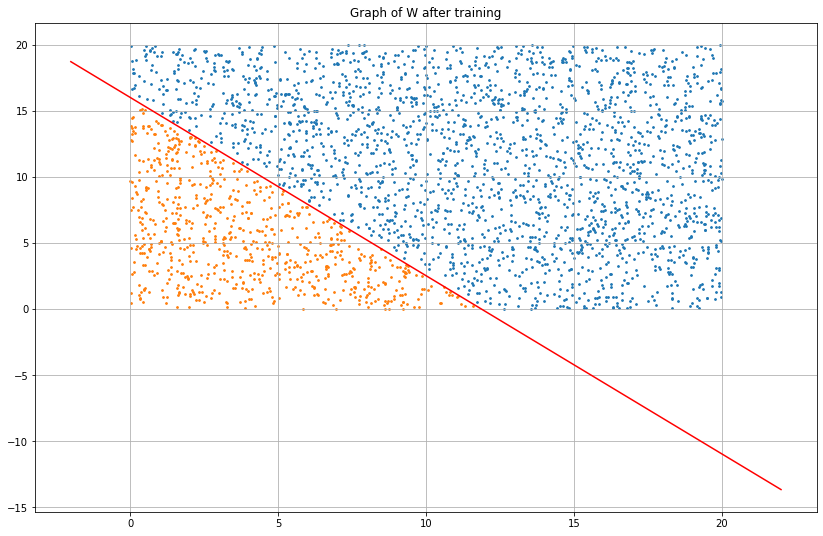

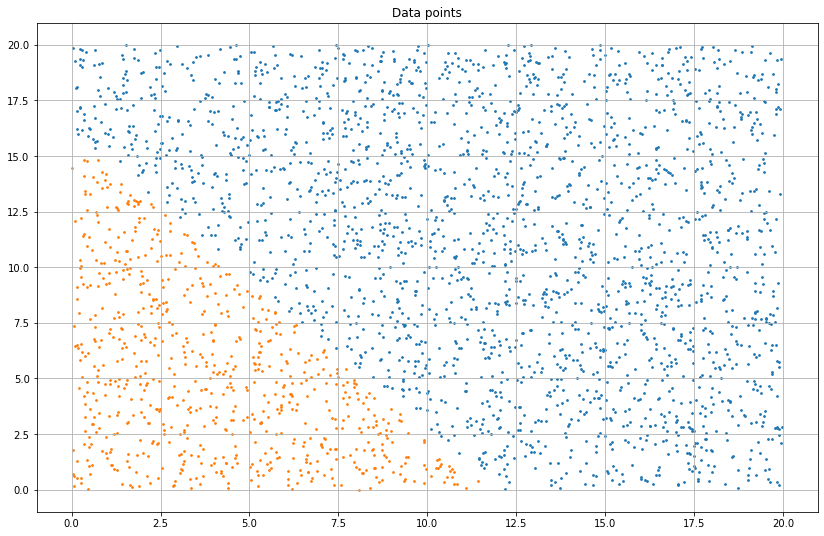

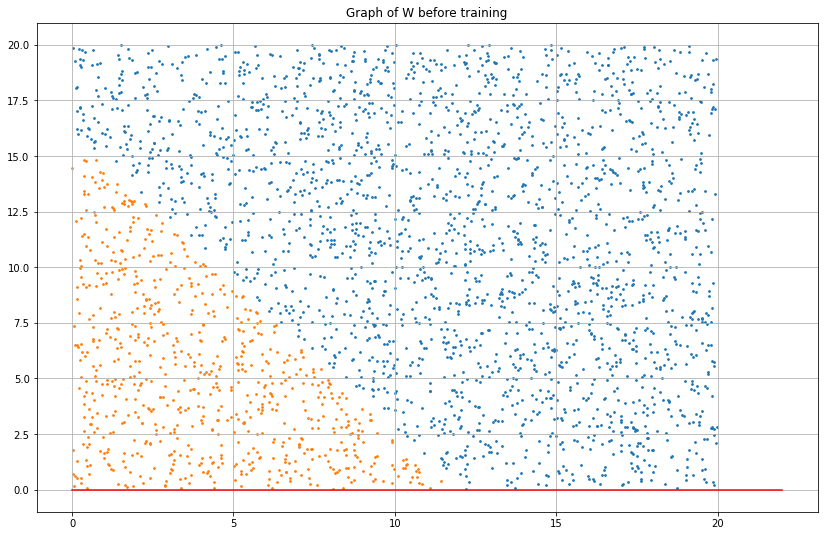

Early stopping at epoch number %d 12


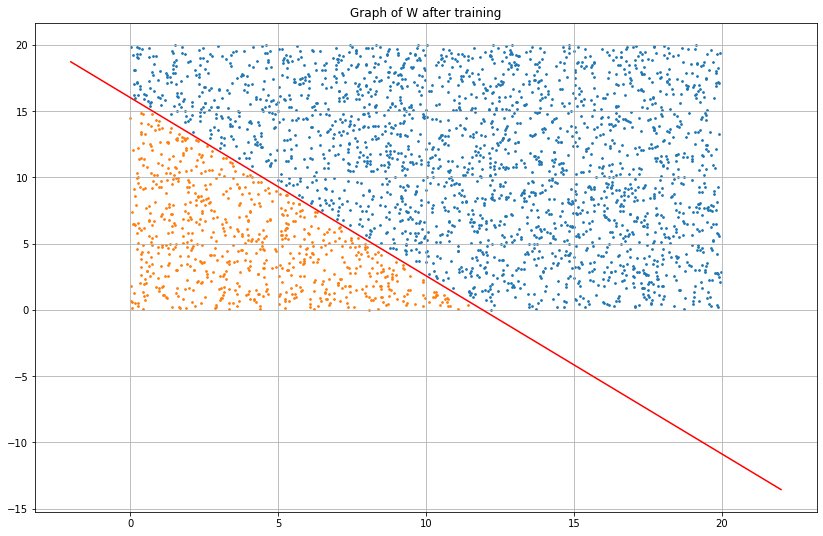

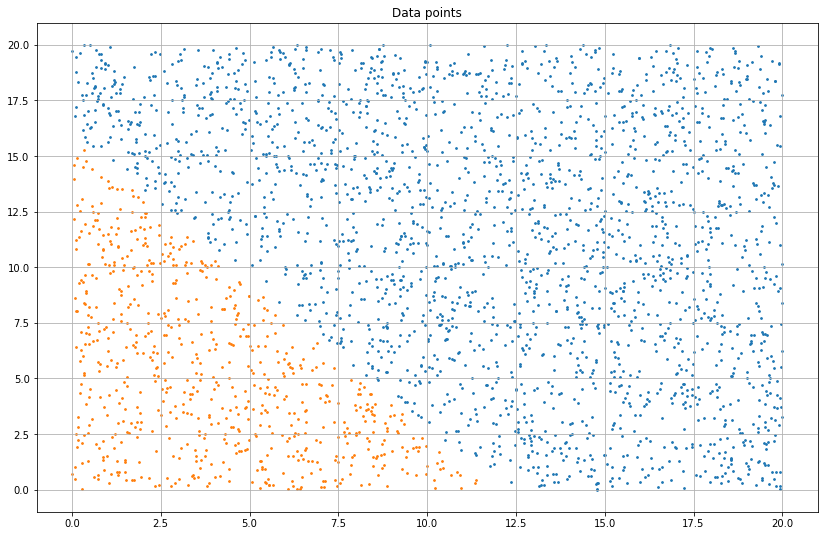

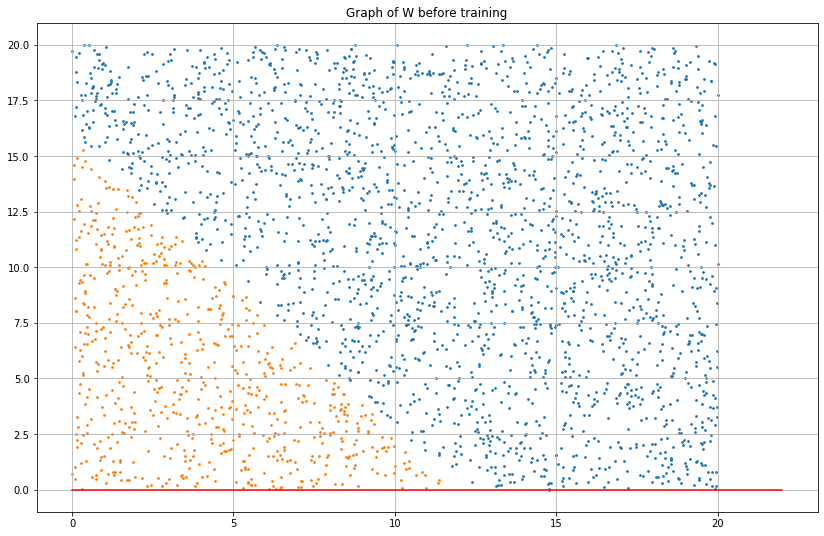

Early stopping at epoch number %d 16


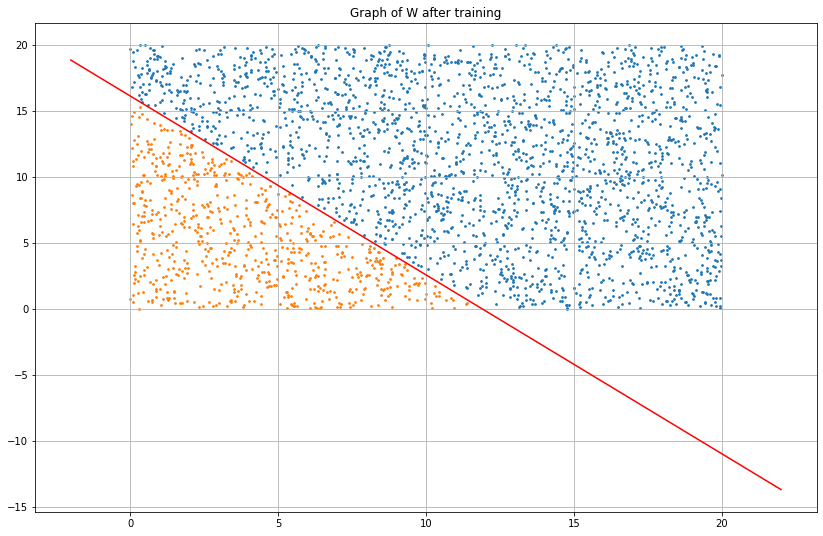

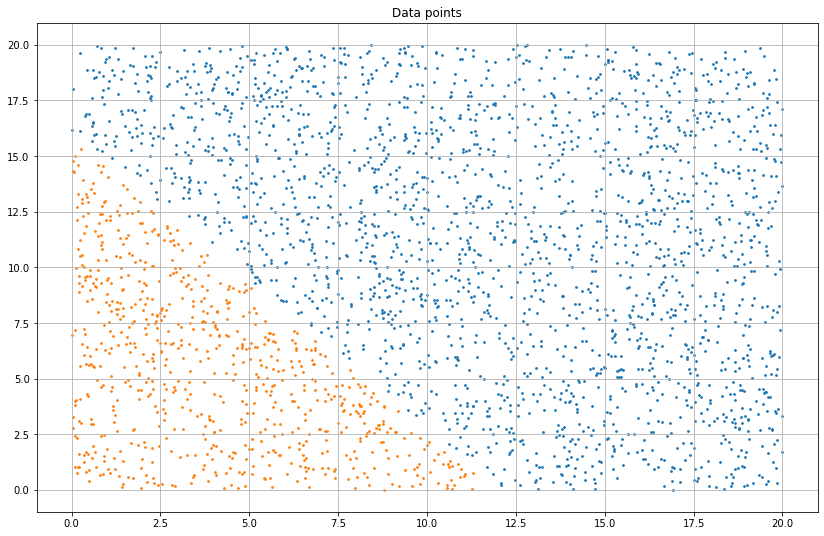

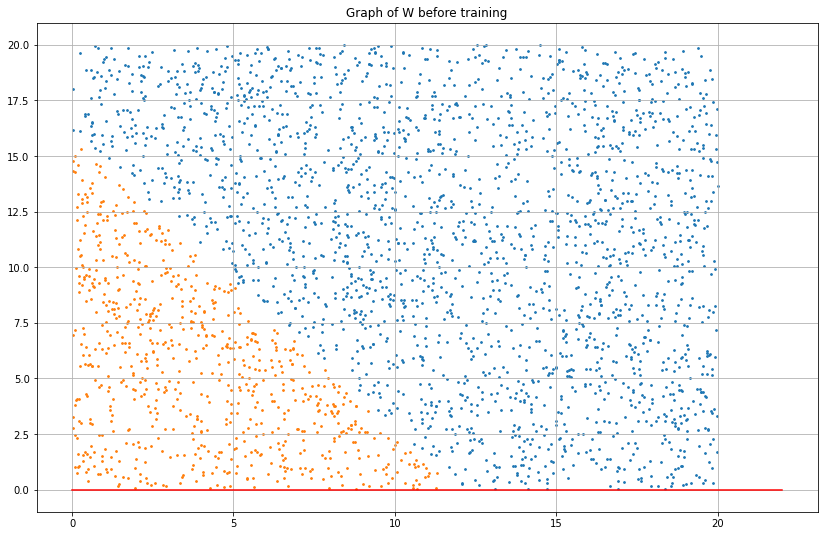

Early stopping at epoch number %d 3


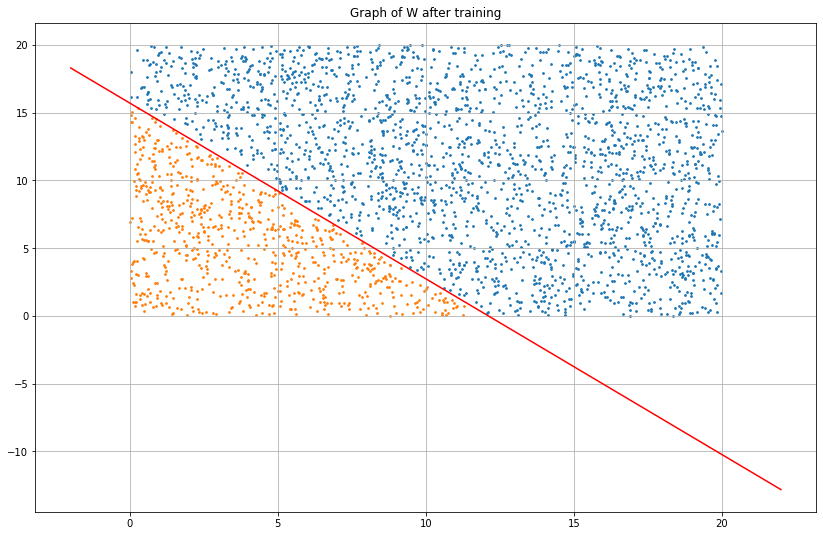

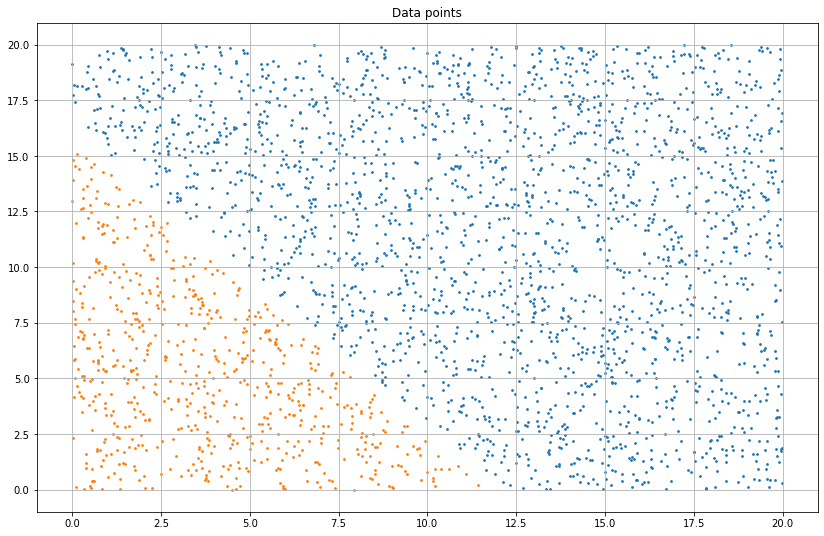

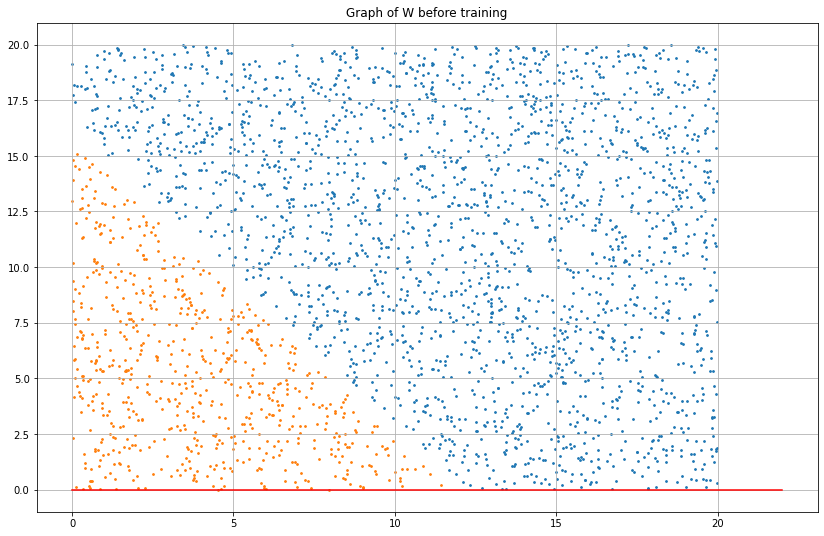

Early stopping at epoch number %d 3


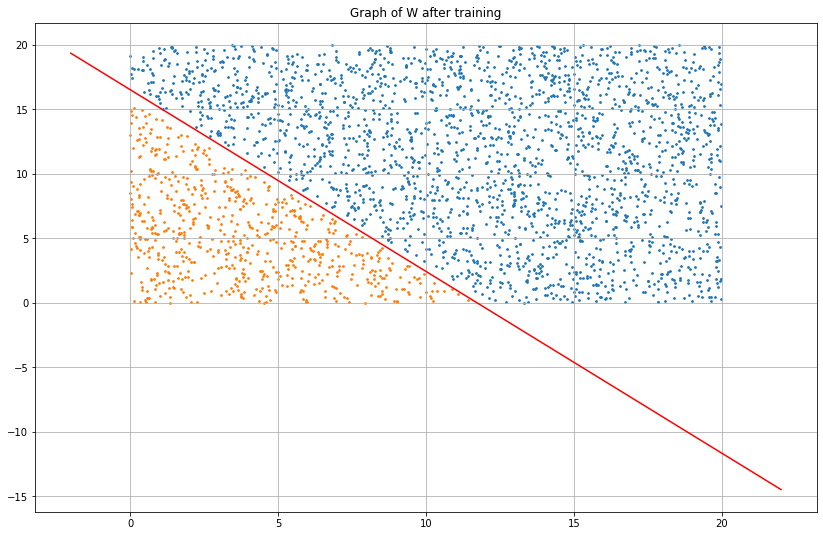

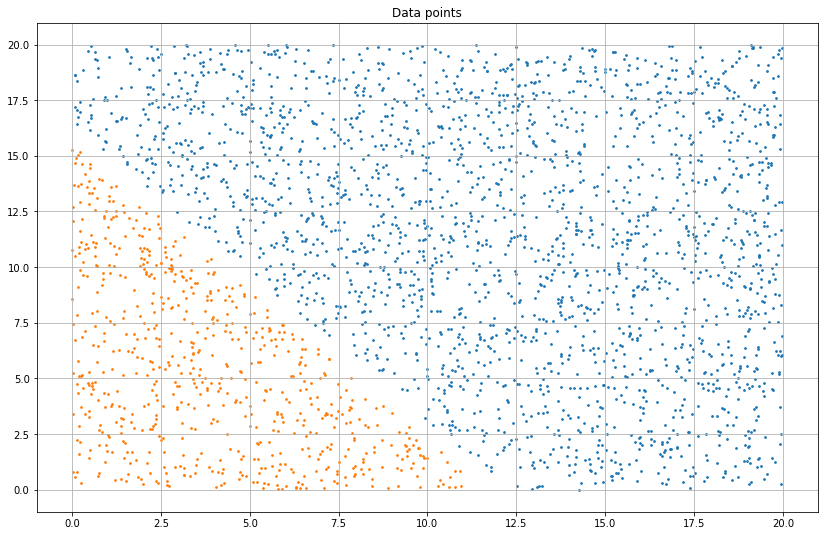

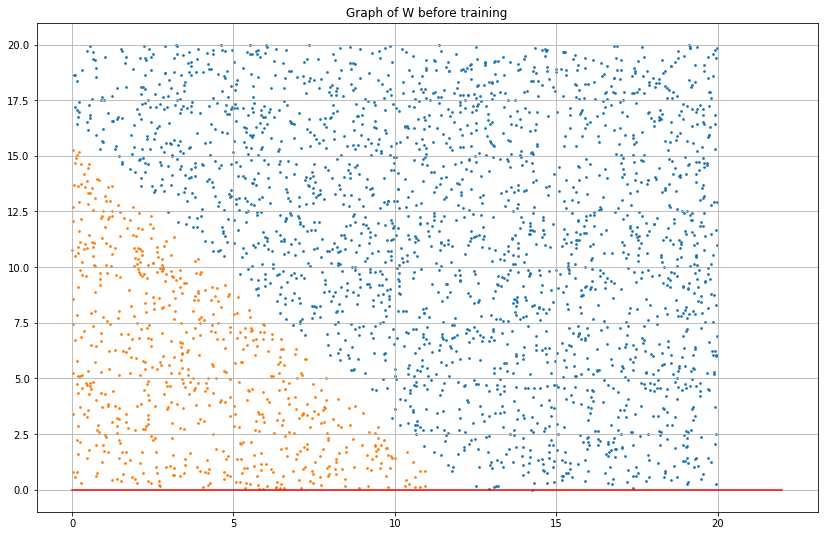

Early stopping at epoch number %d 2


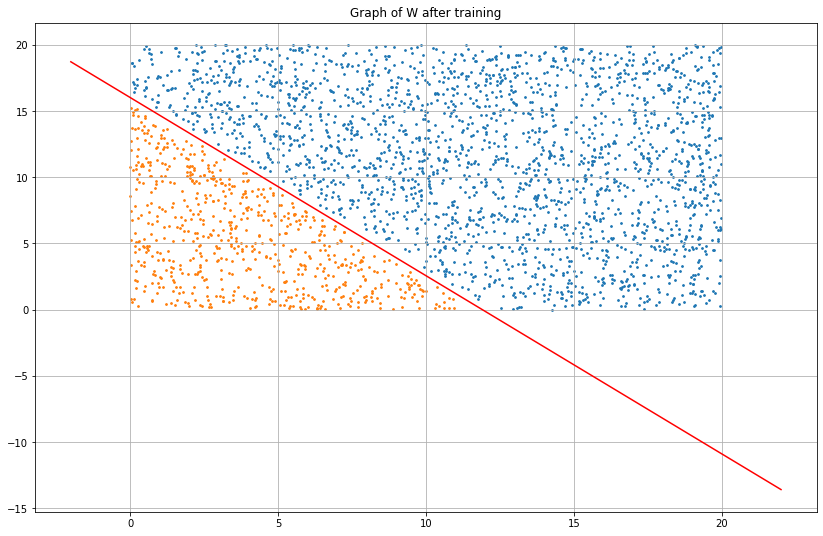

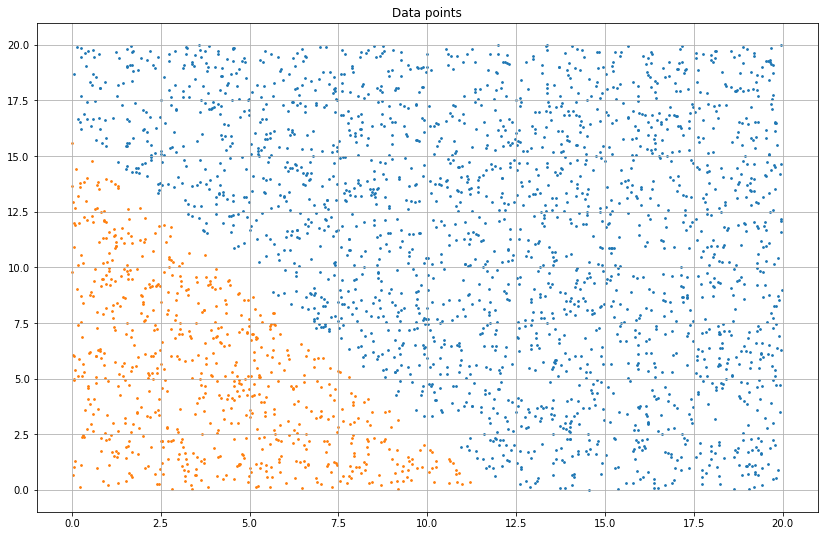

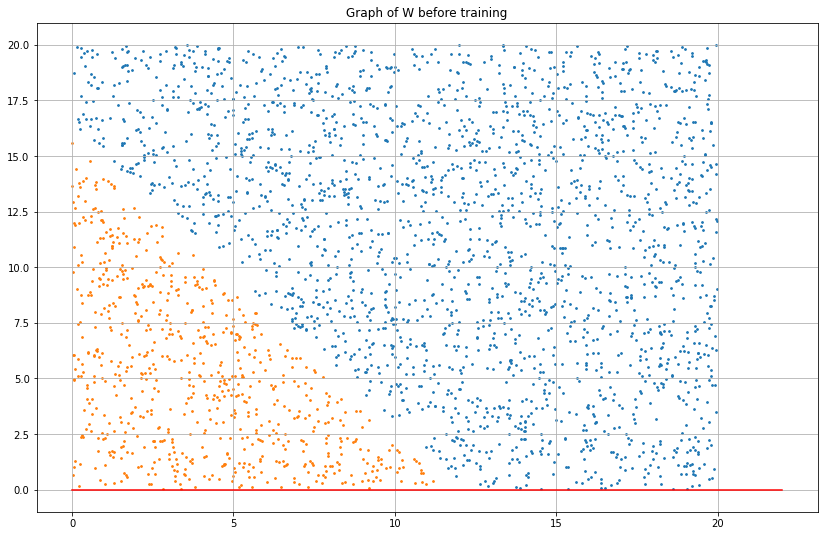

Early stopping at epoch number %d 2


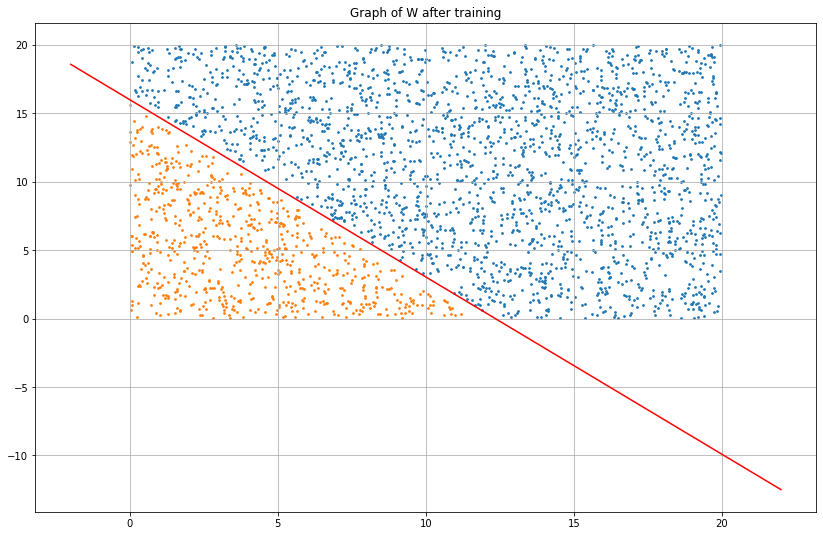

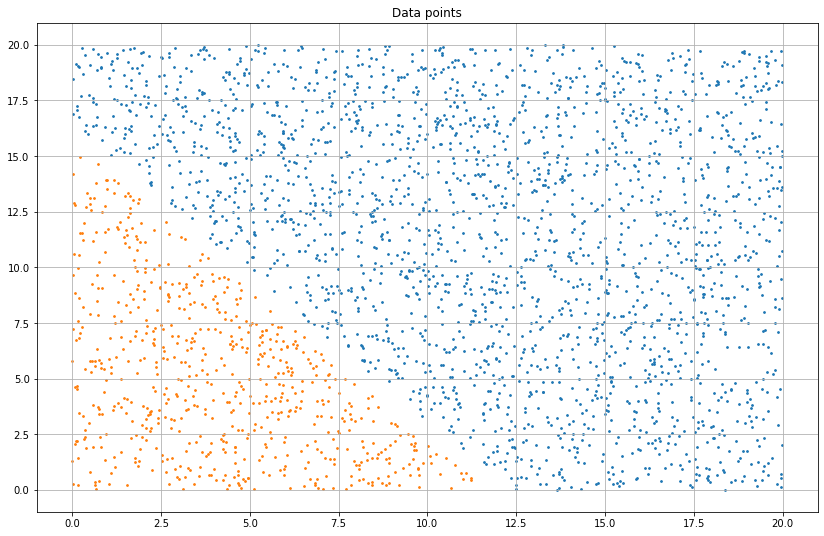

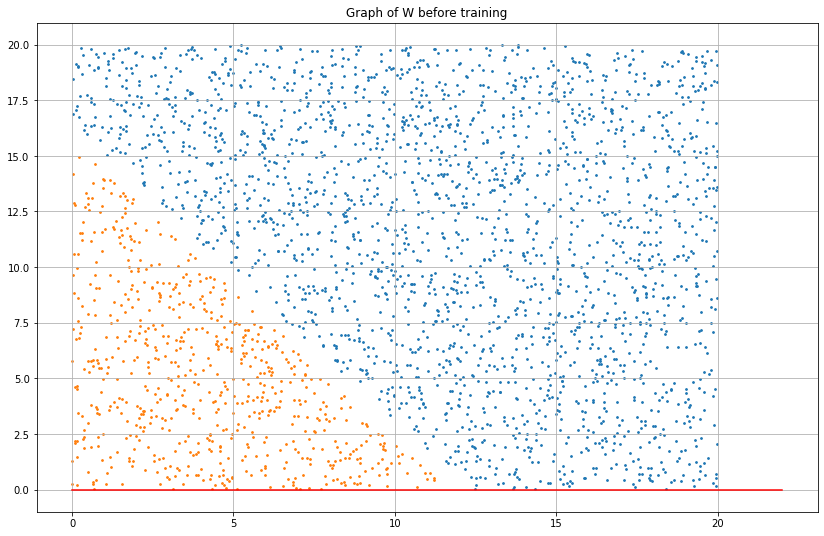

Early stopping at epoch number %d 3


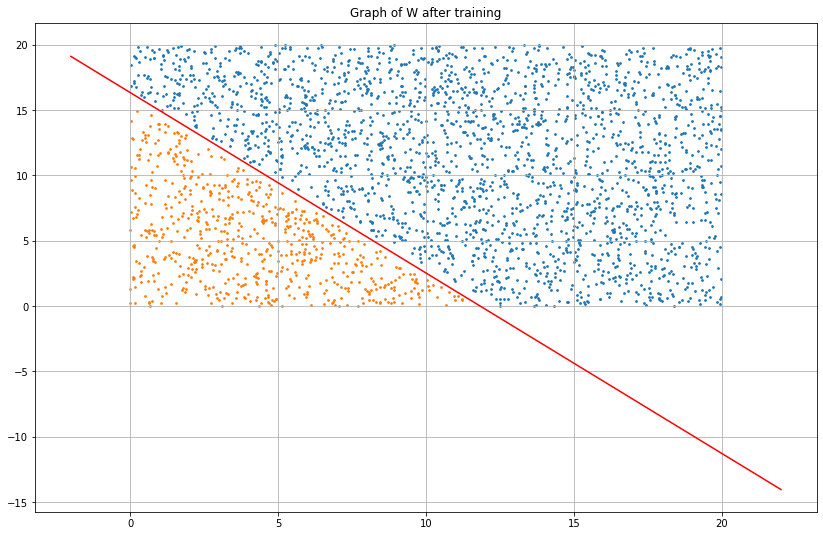

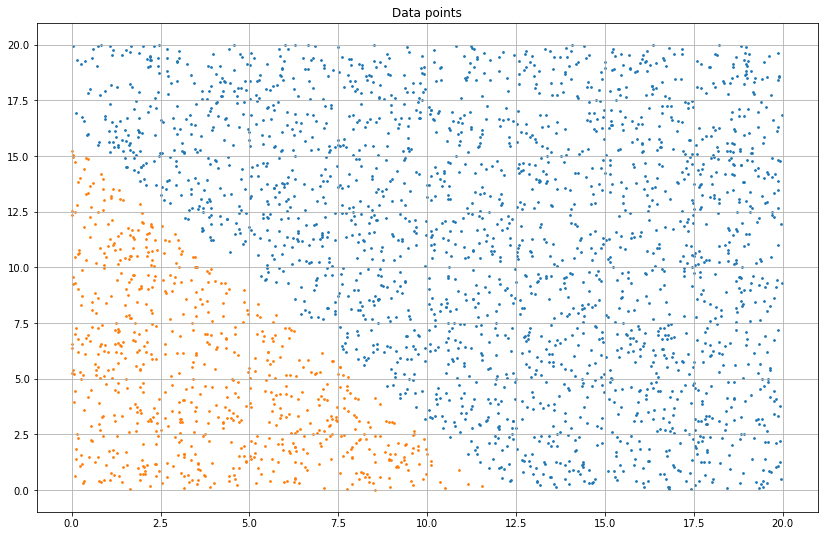

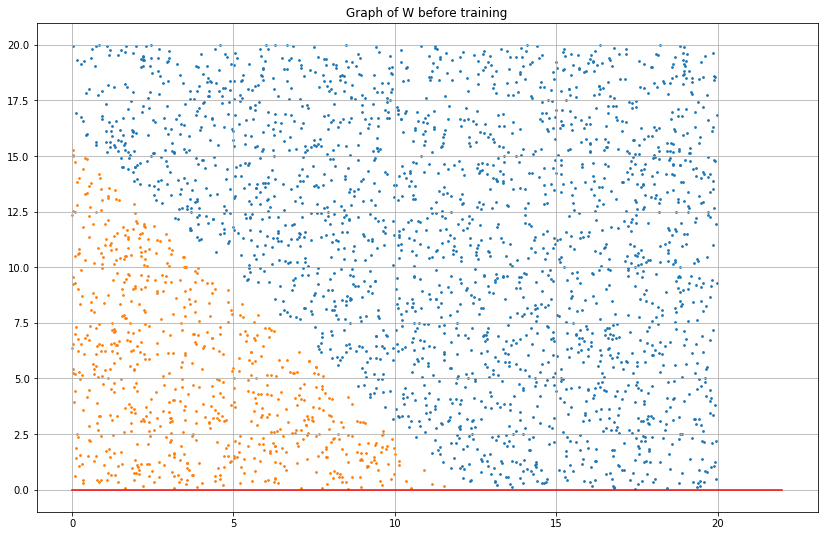

Early stopping at epoch number %d 4


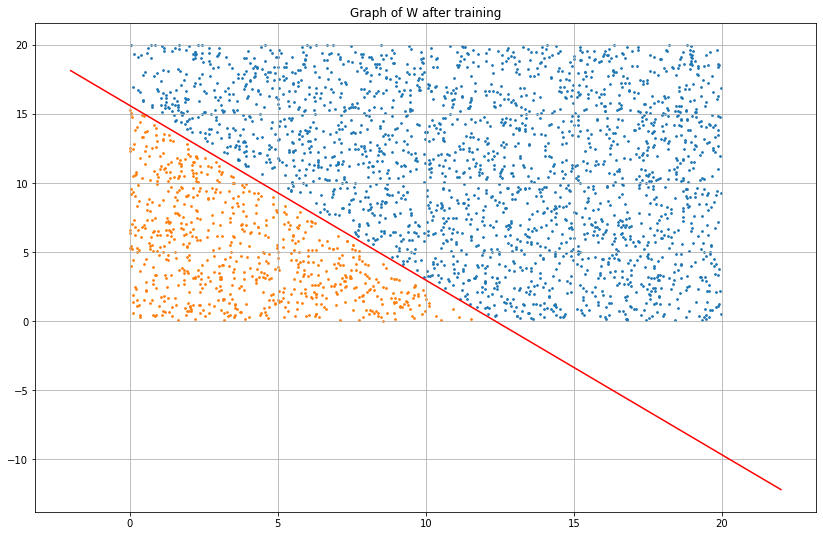

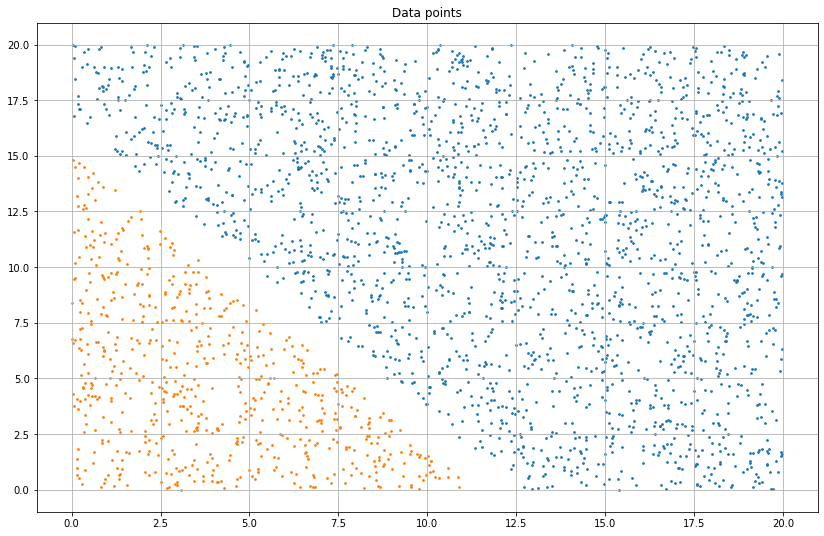

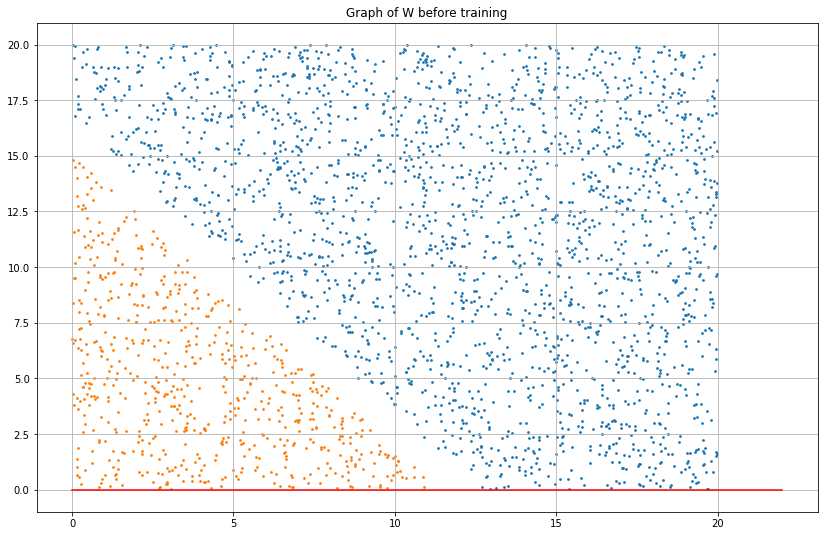

Early stopping at epoch number %d 2


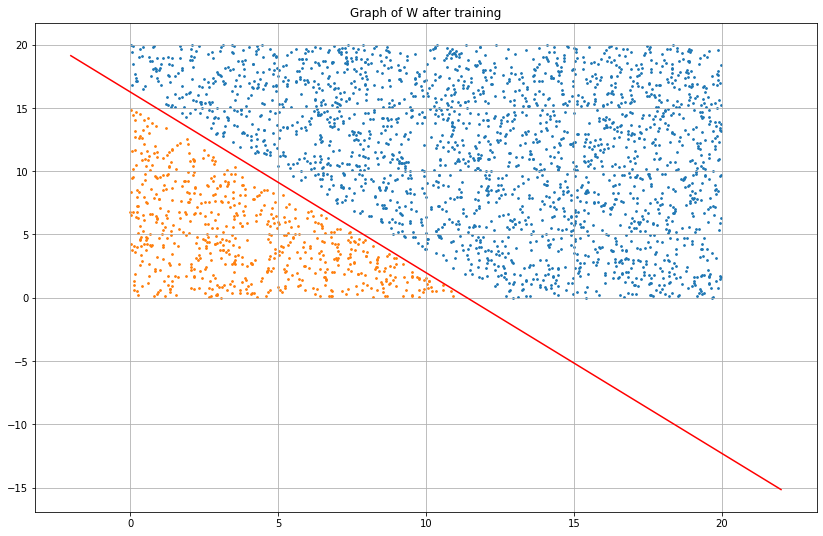

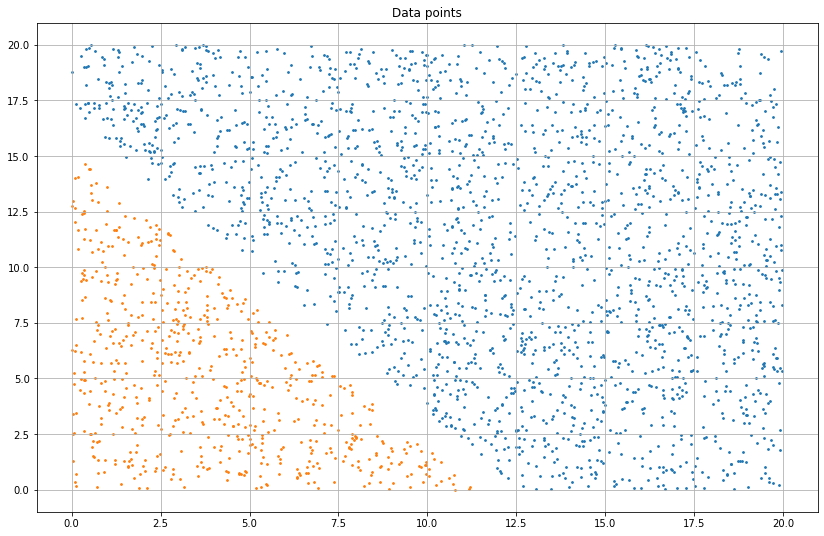

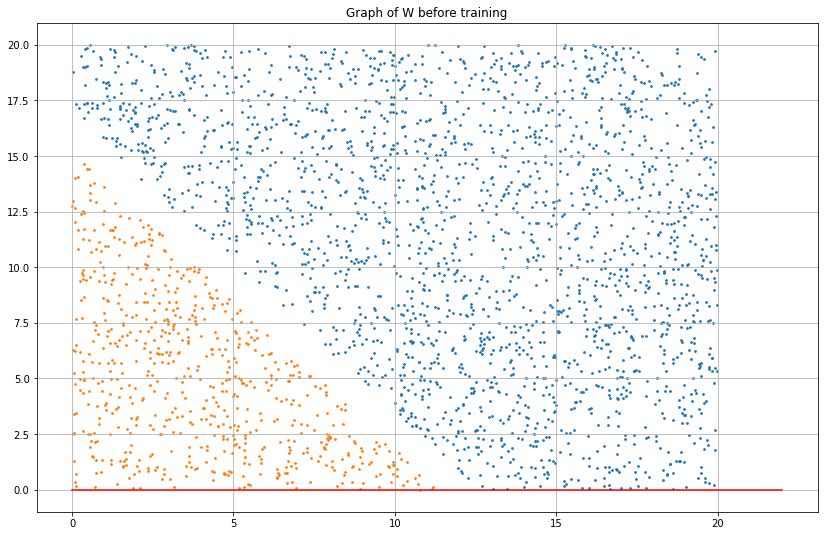

Early stopping at epoch number %d 4


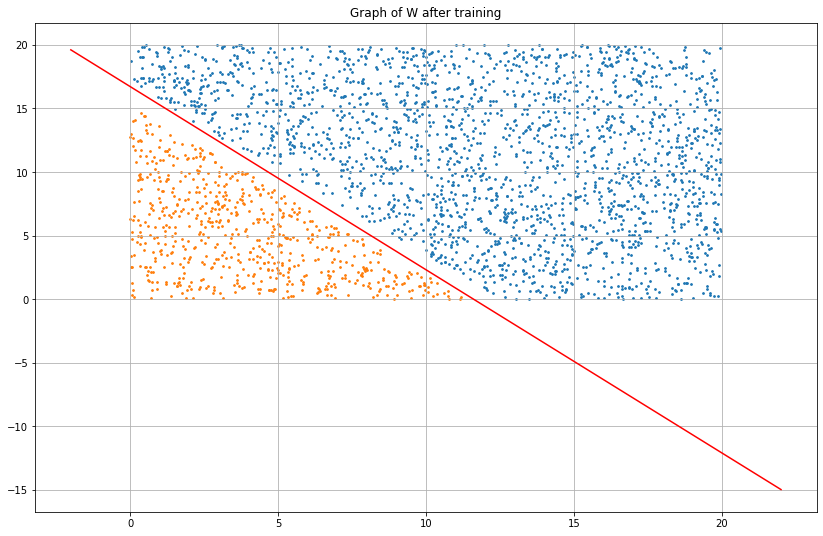

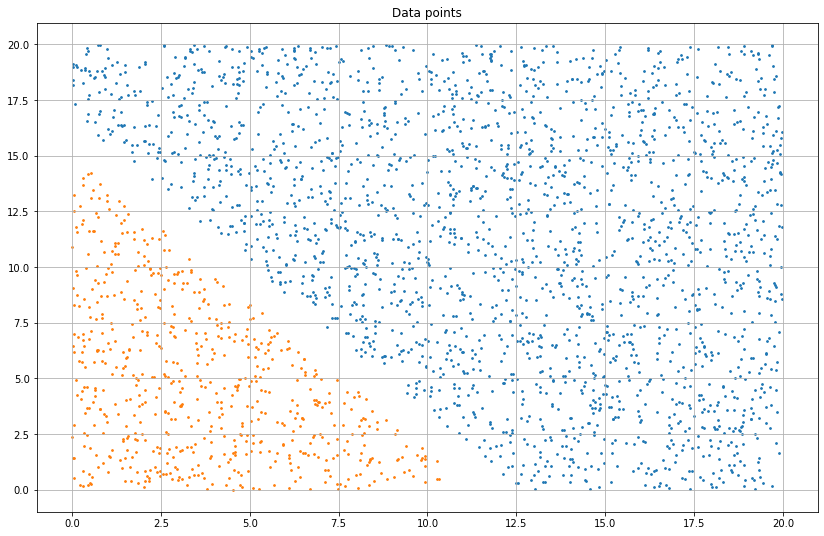

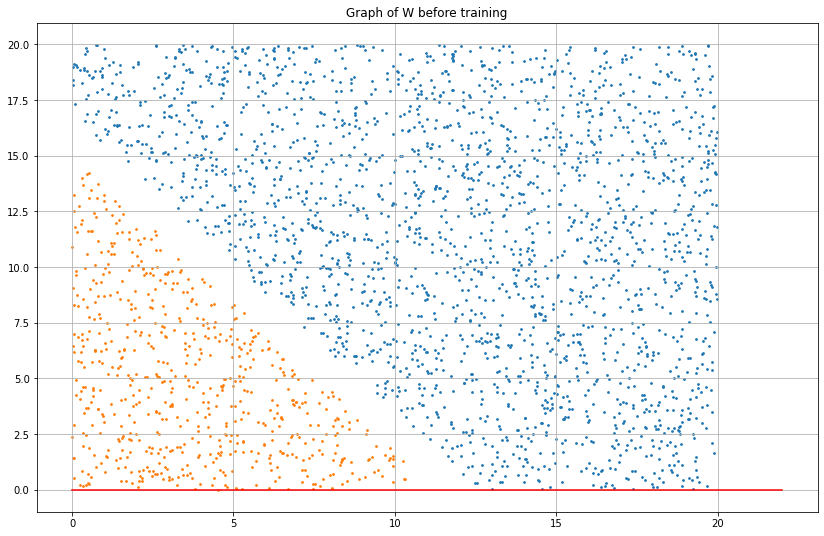

Early stopping at epoch number %d 2


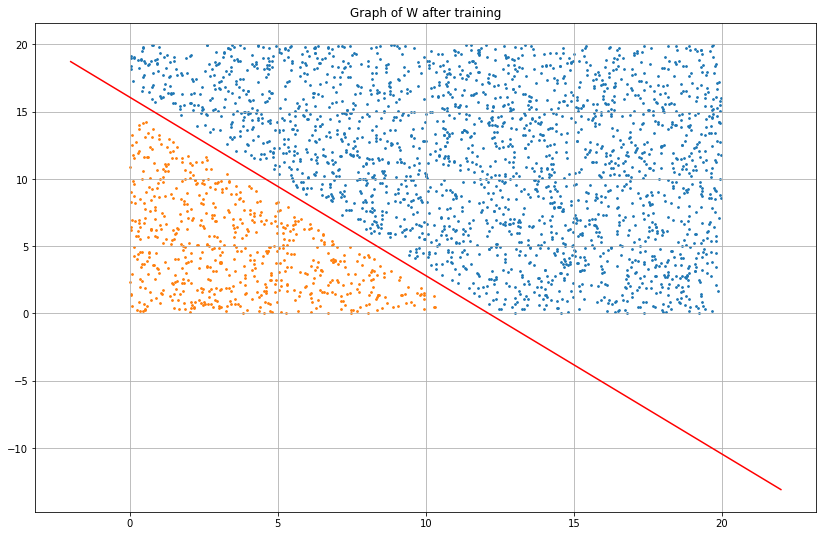

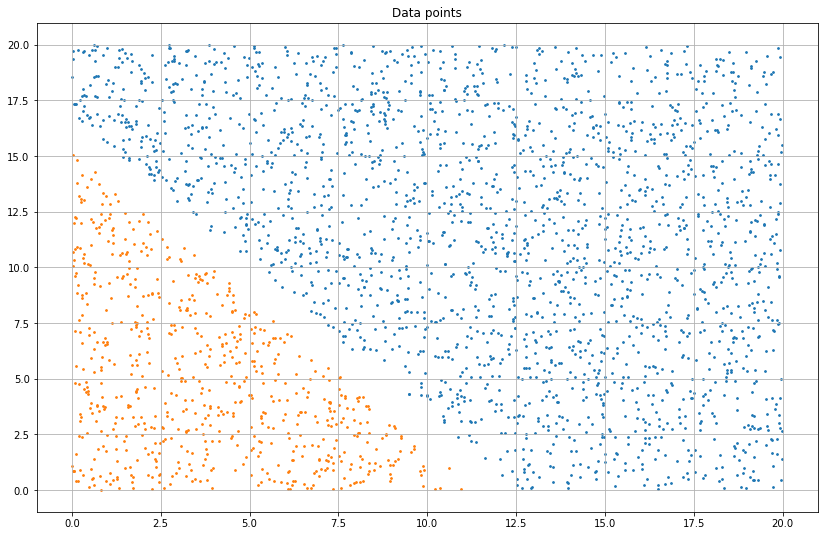

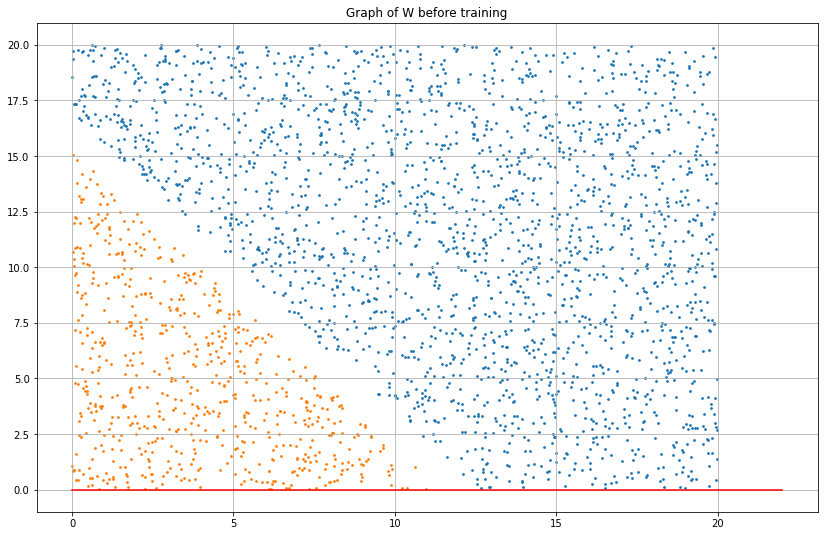

Early stopping at epoch number %d 1


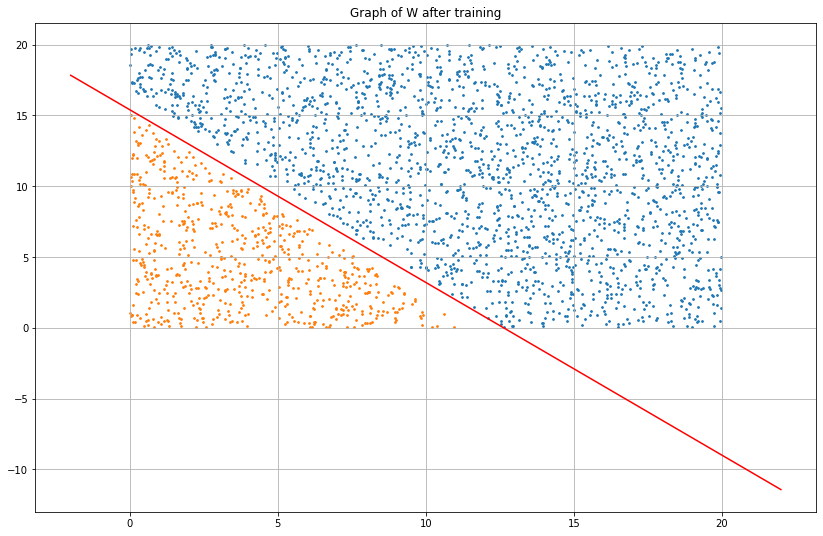

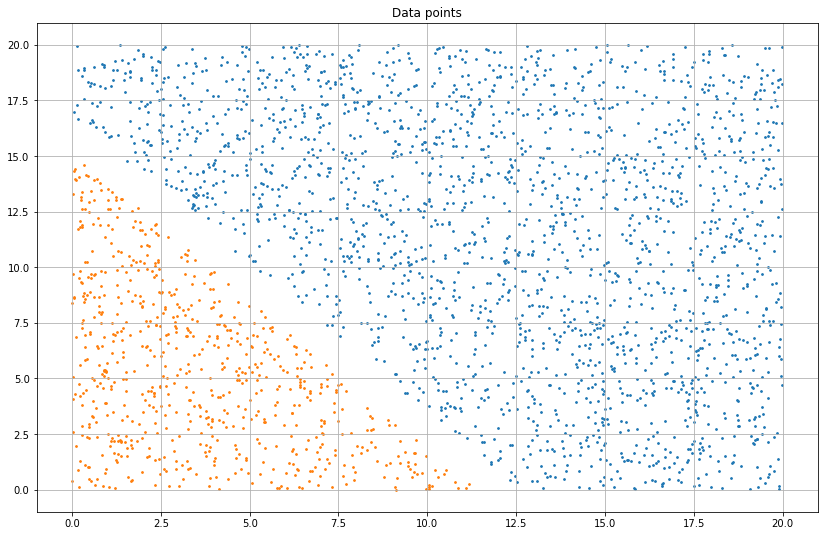

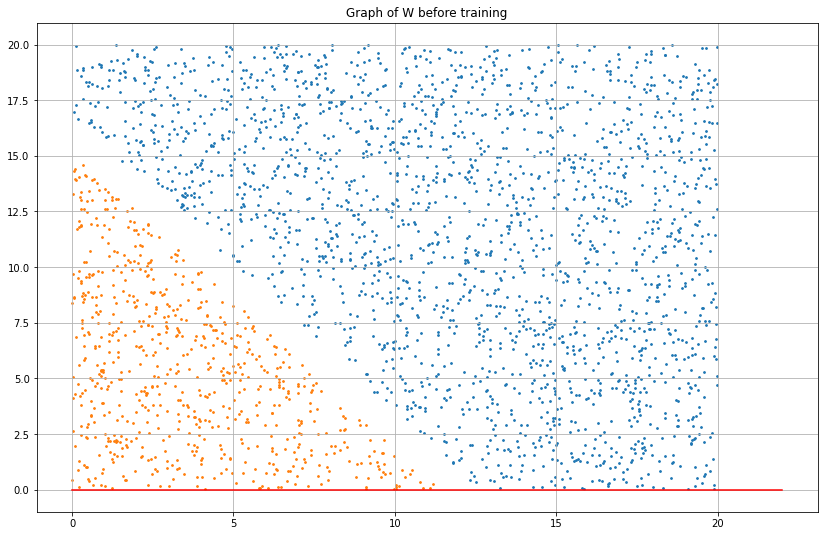

Early stopping at epoch number %d 2


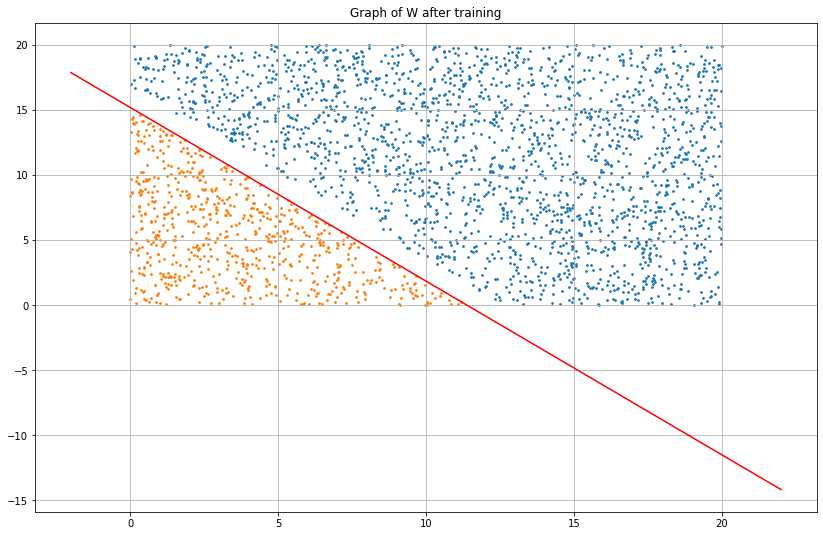

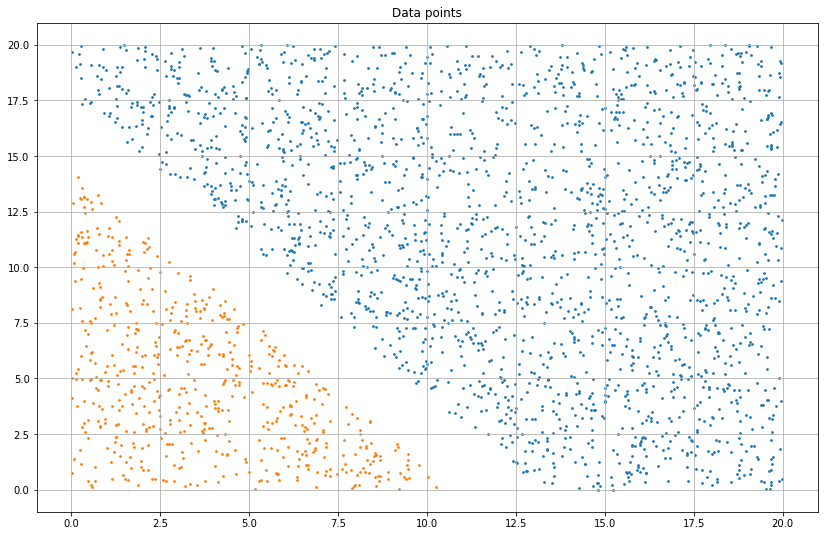

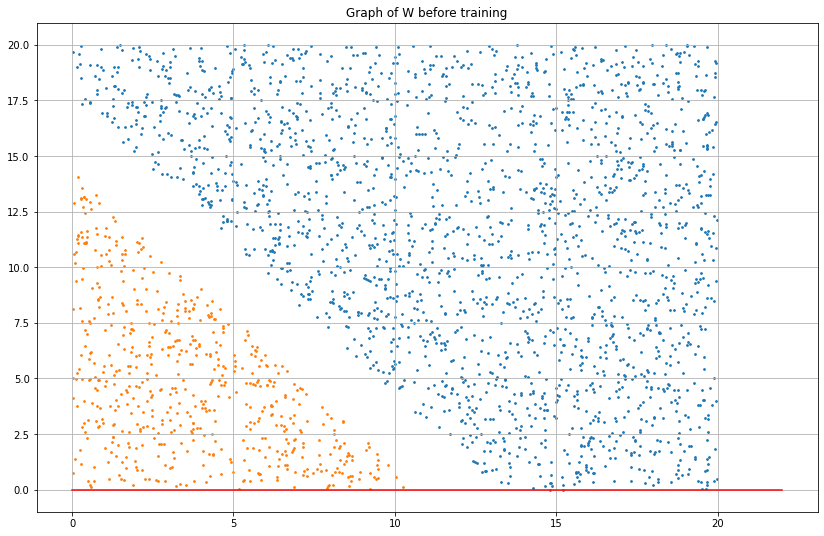

Early stopping at epoch number %d 1


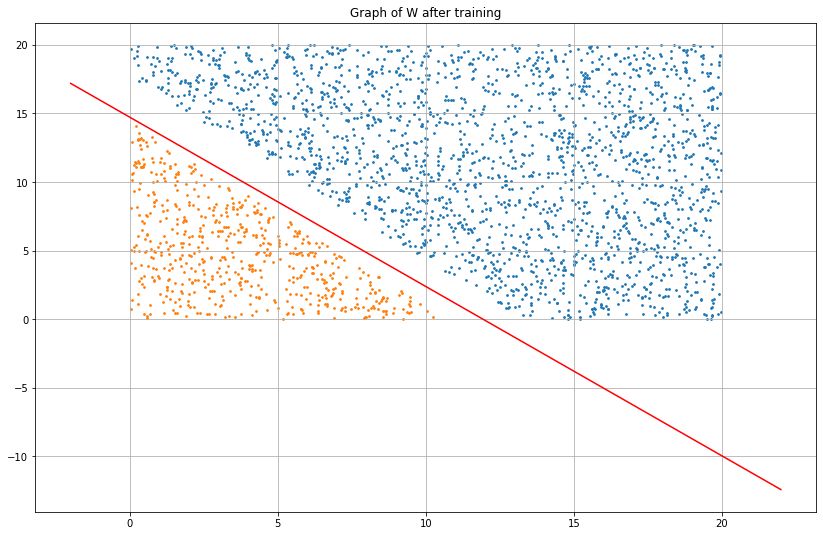

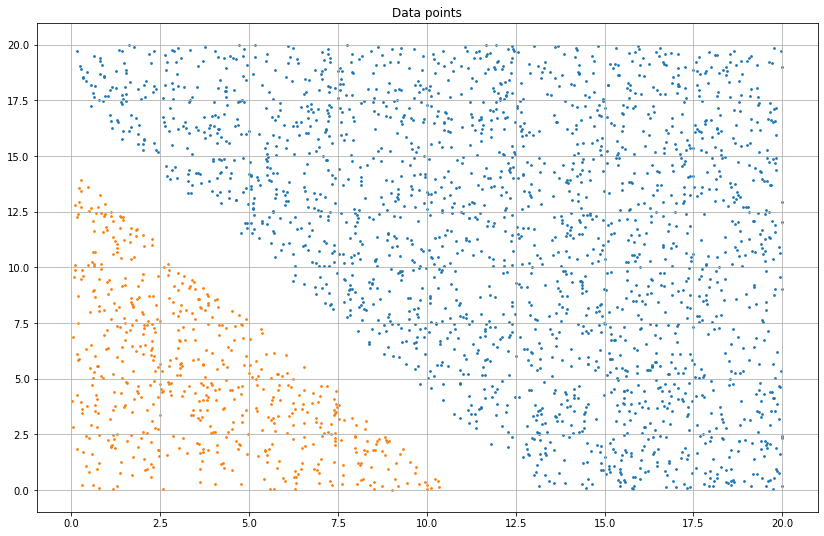

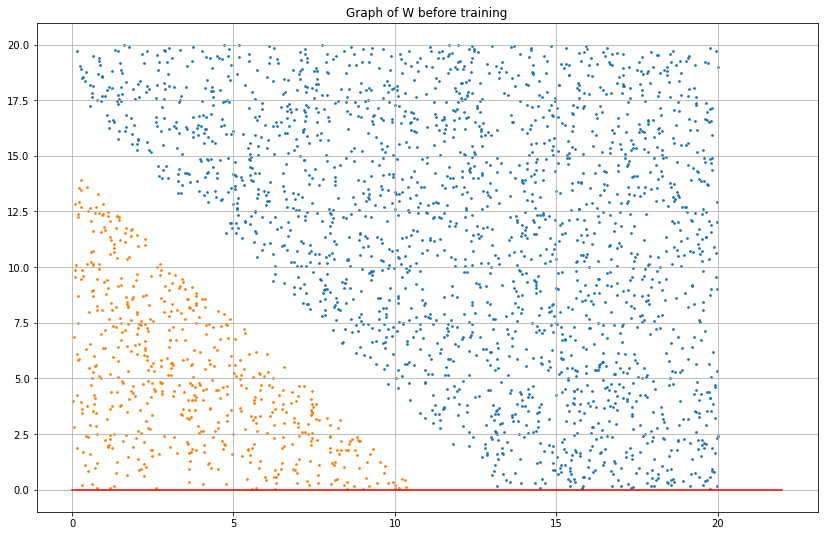

Early stopping at epoch number %d 2


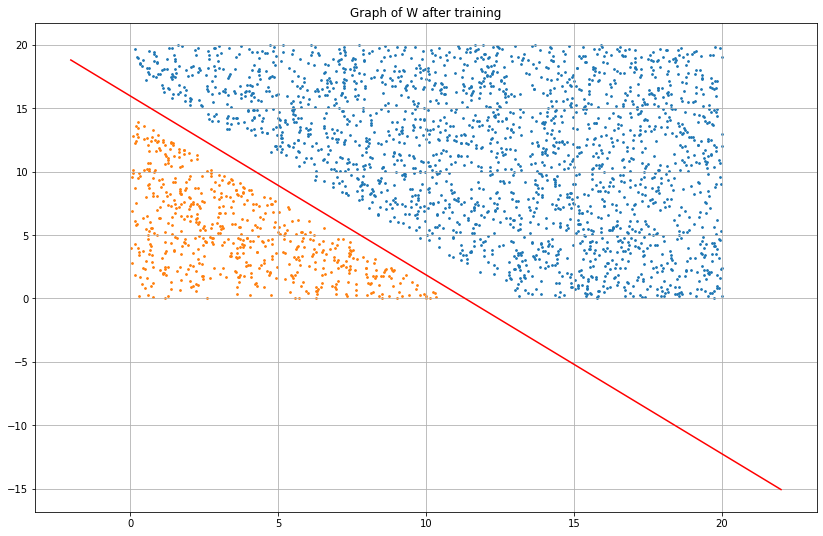

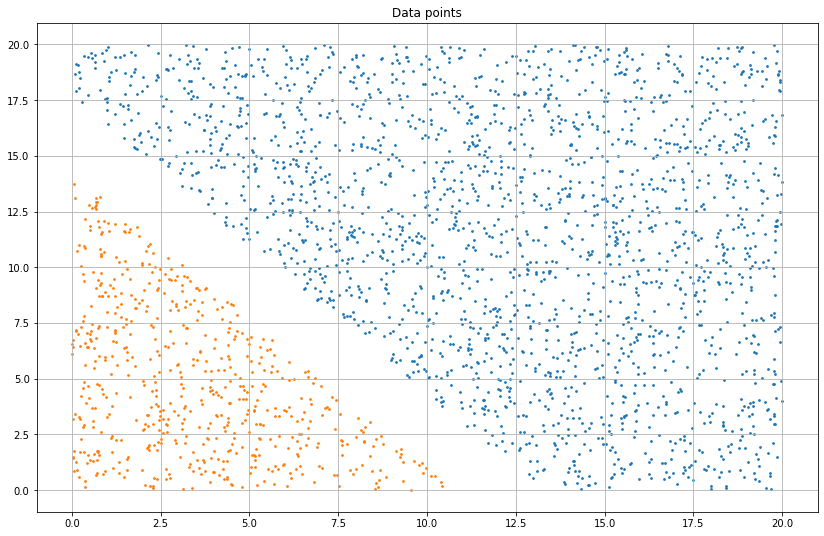

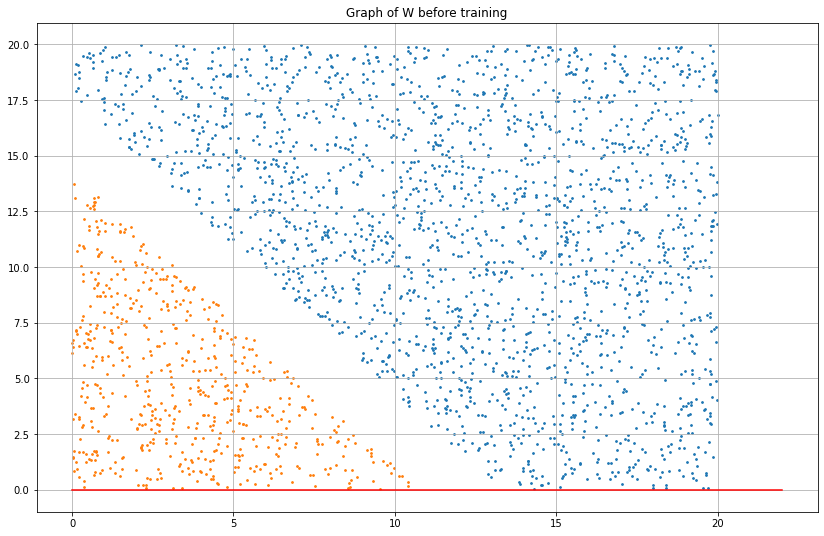

Early stopping at epoch number %d 1


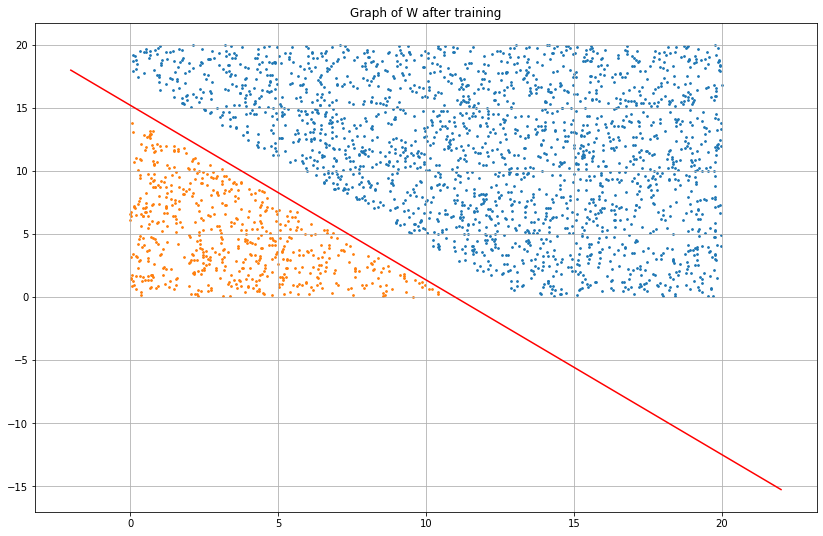

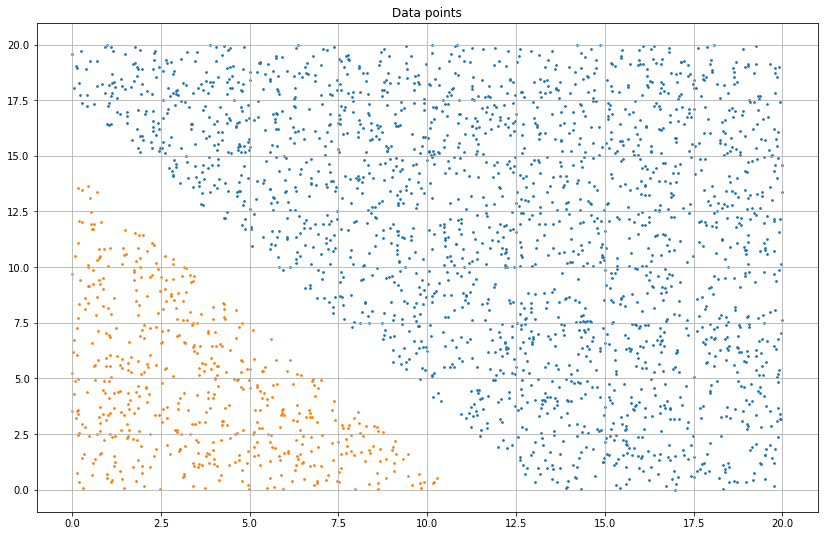

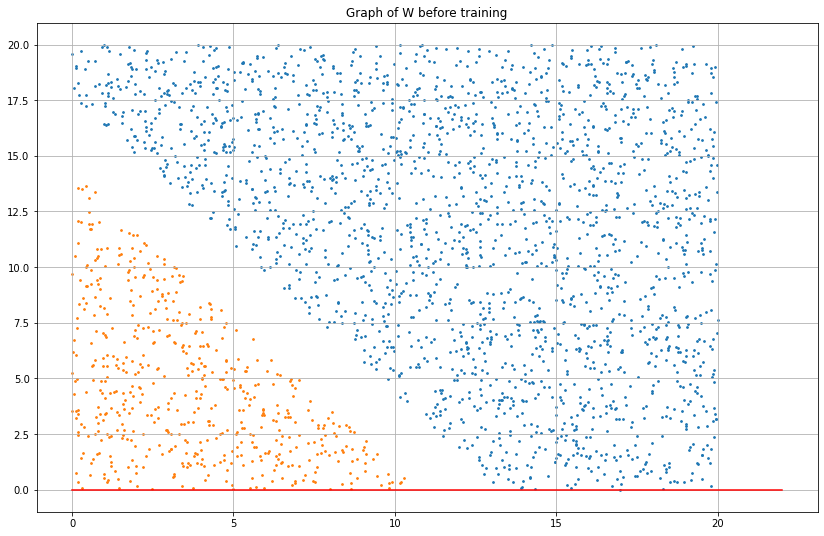

Early stopping at epoch number %d 1


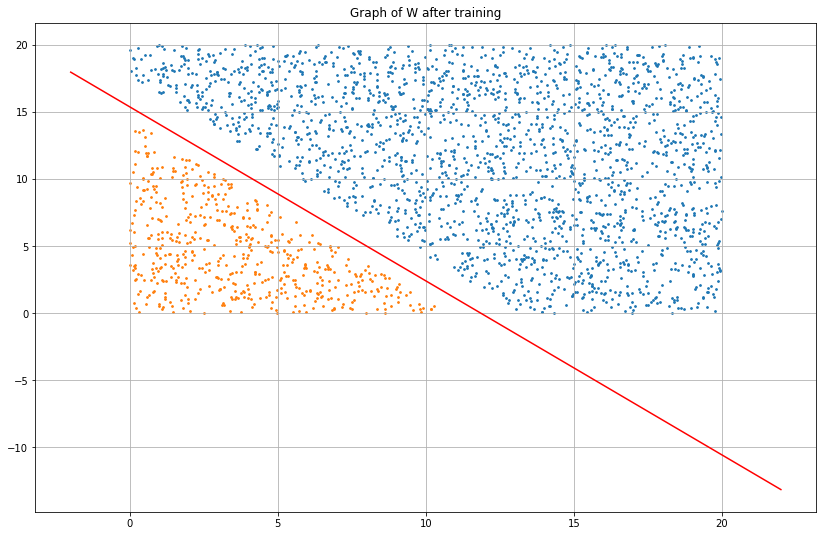

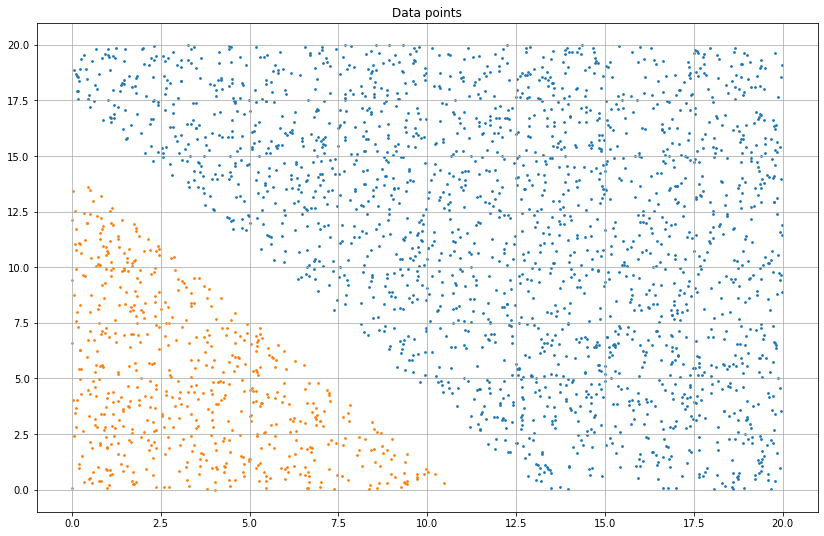

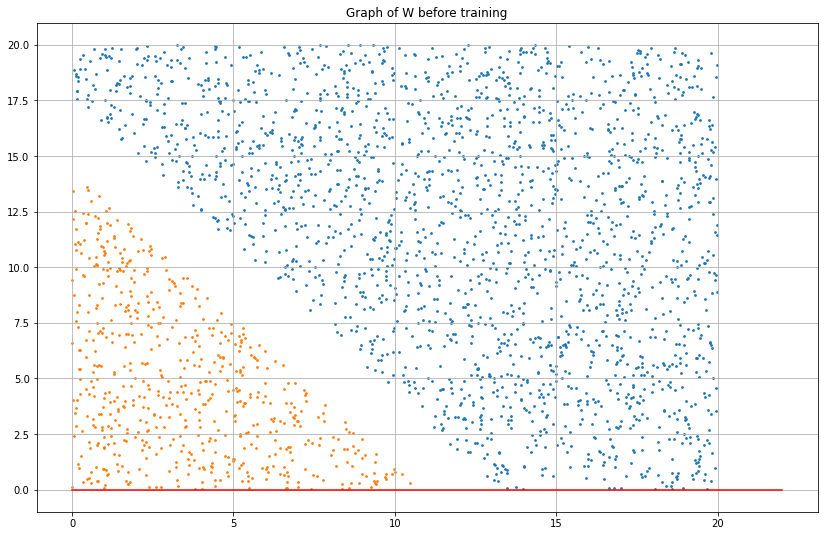

Early stopping at epoch number %d 1


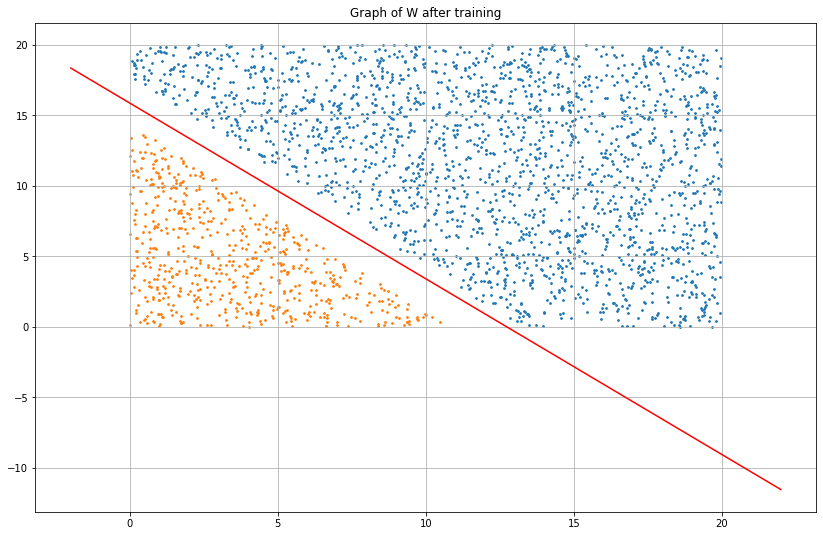

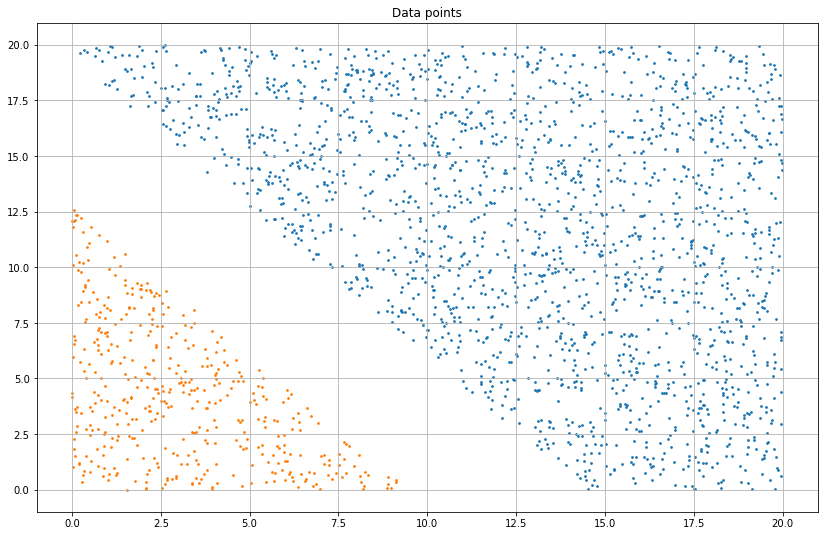

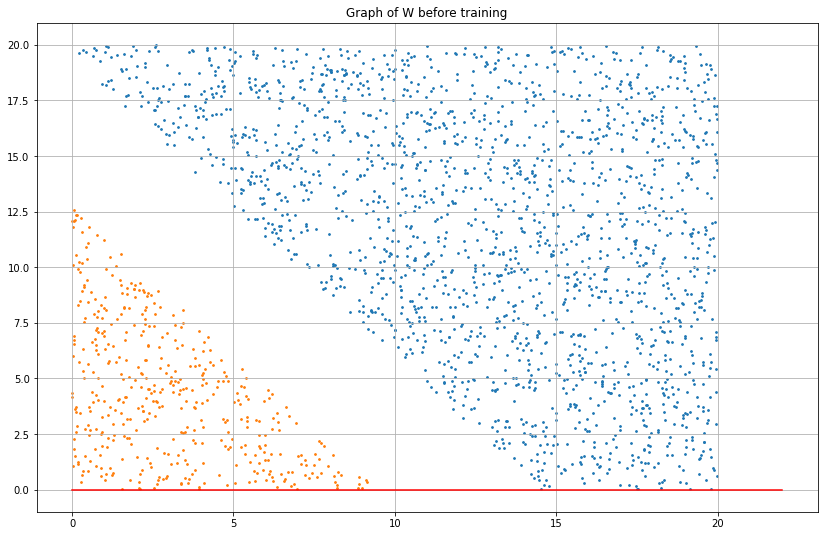

Early stopping at epoch number %d 1


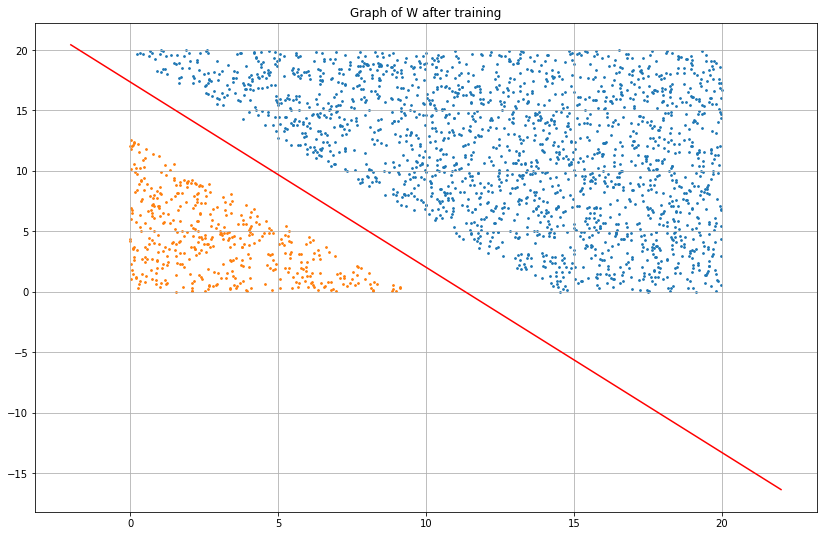

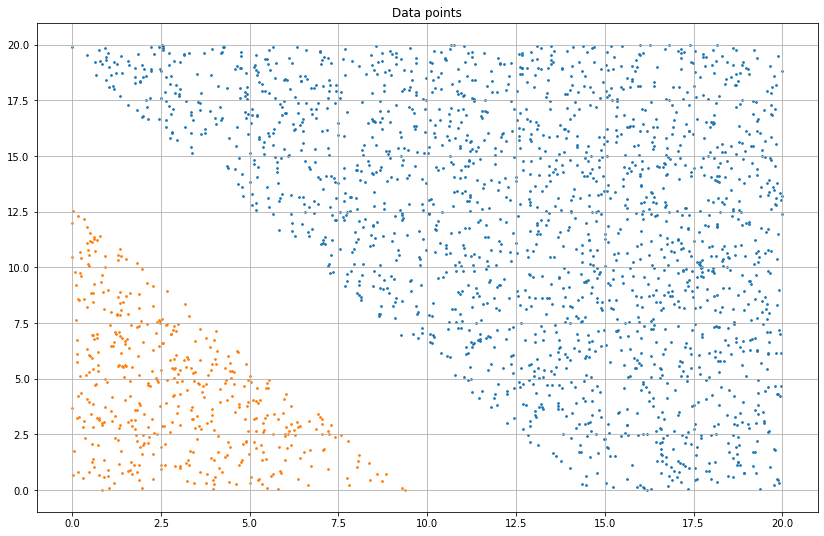

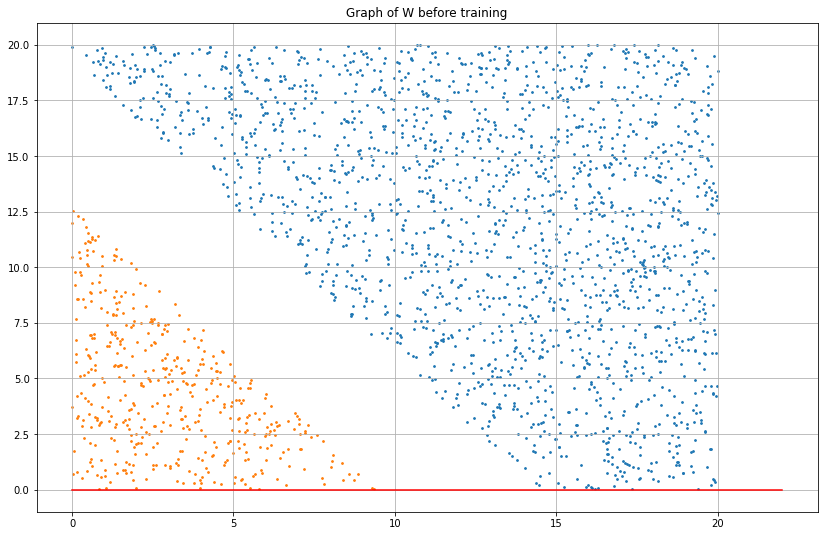

Early stopping at epoch number %d 3


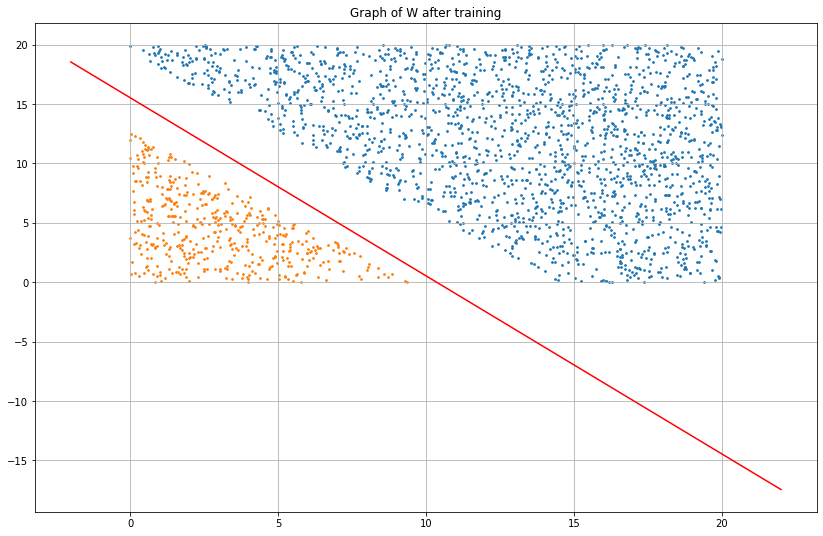

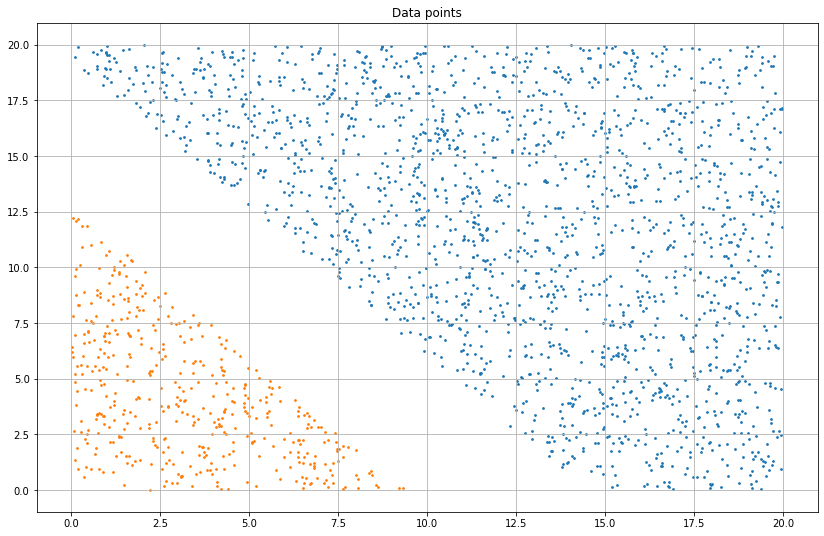

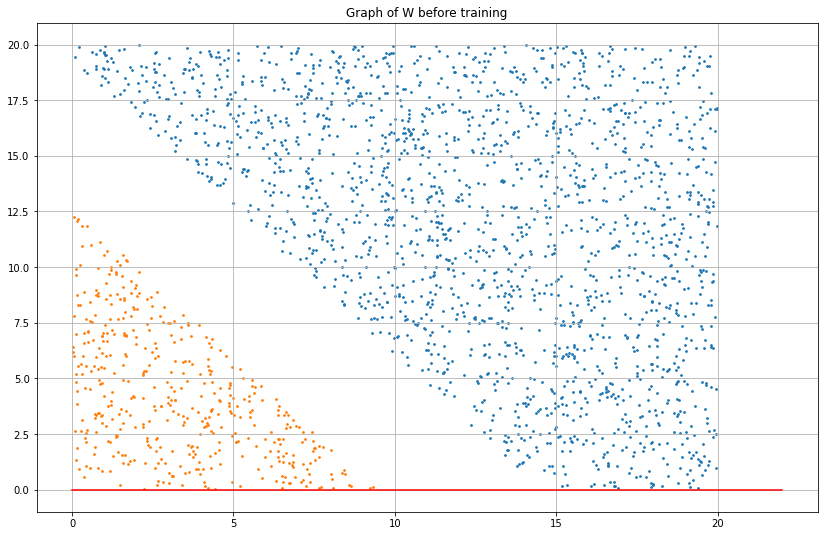

Early stopping at epoch number %d 1


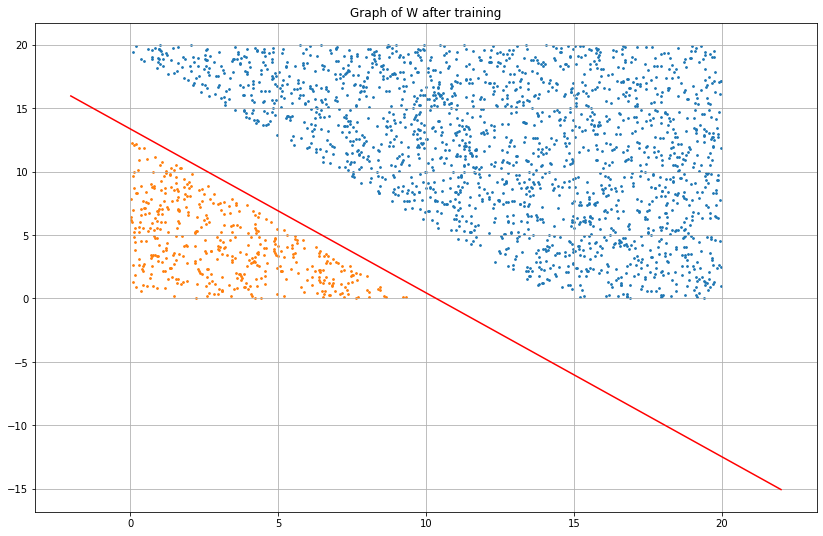

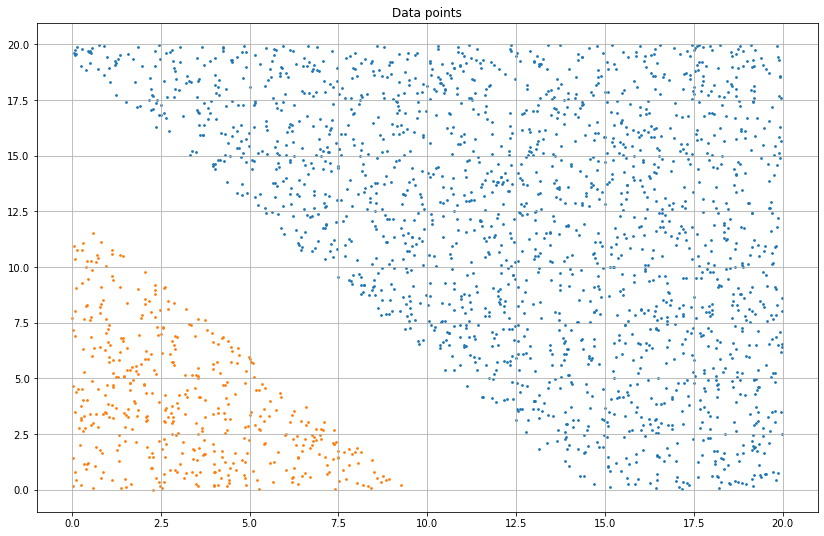

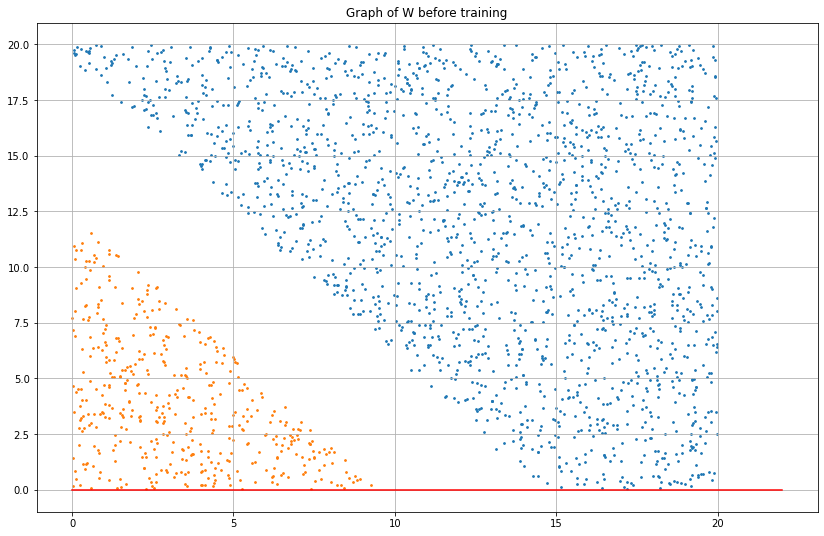

Early stopping at epoch number %d 2


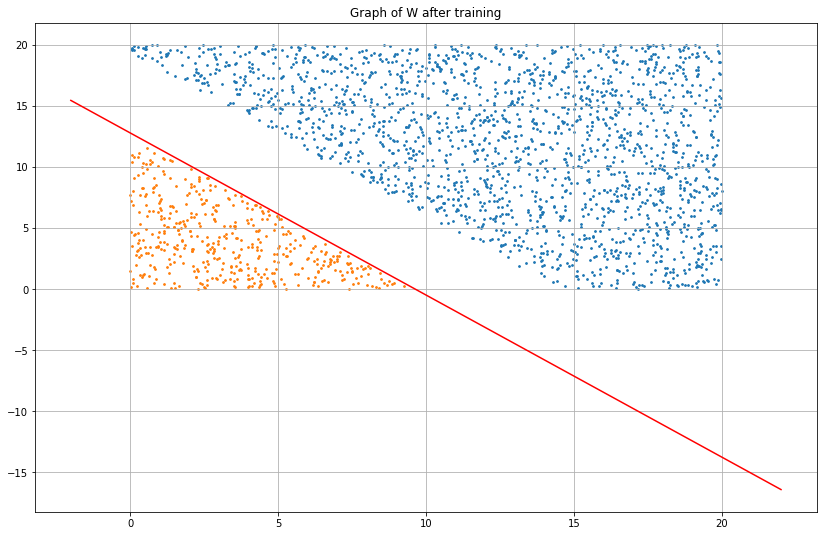

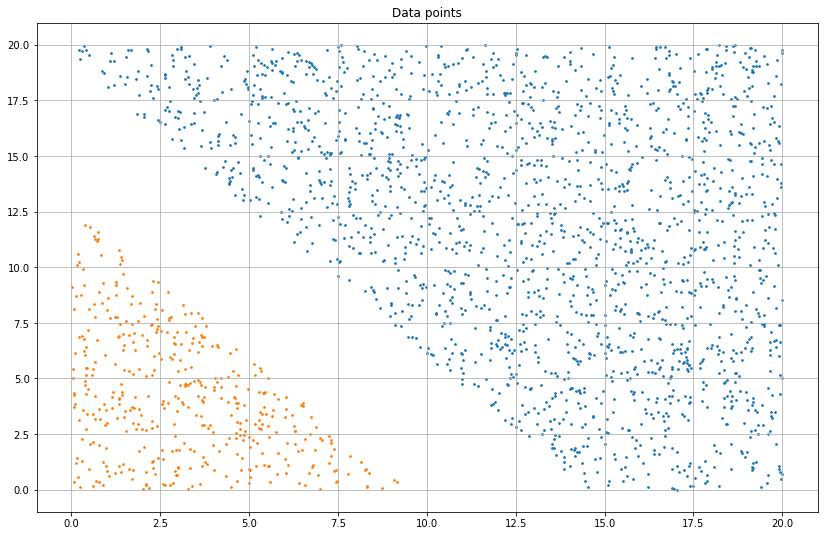

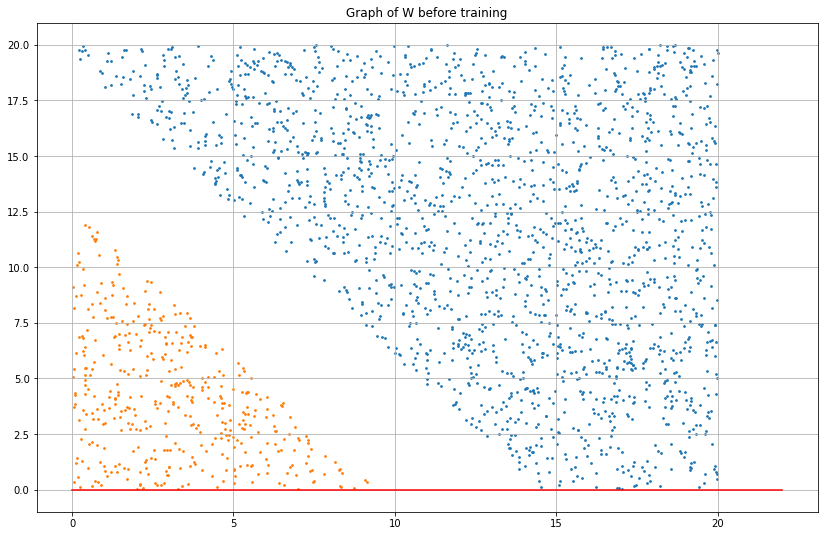

Early stopping at epoch number %d 1


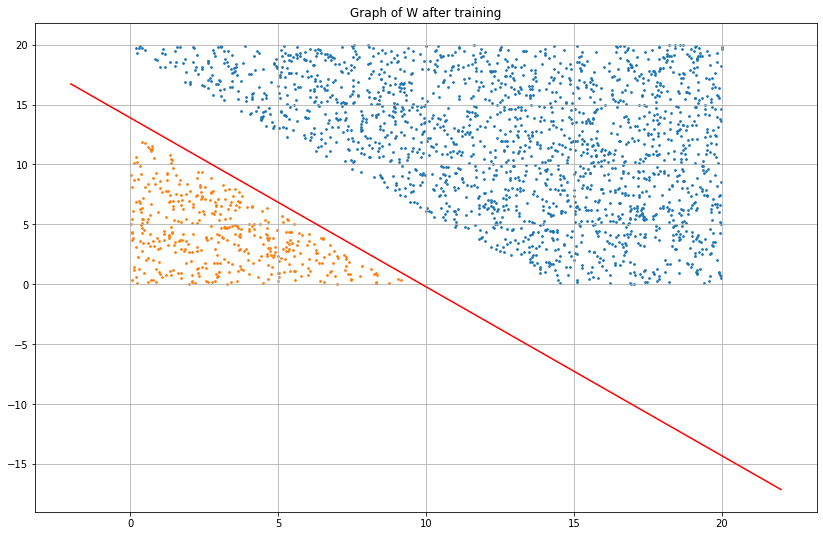

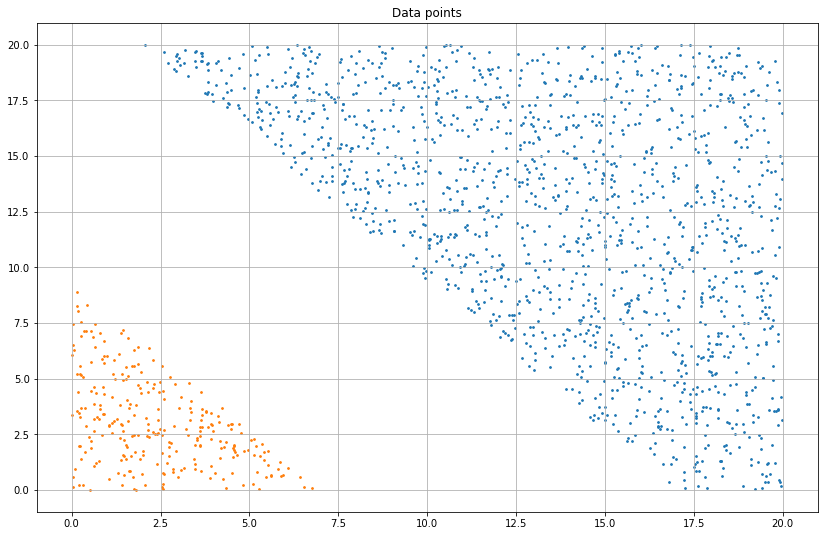

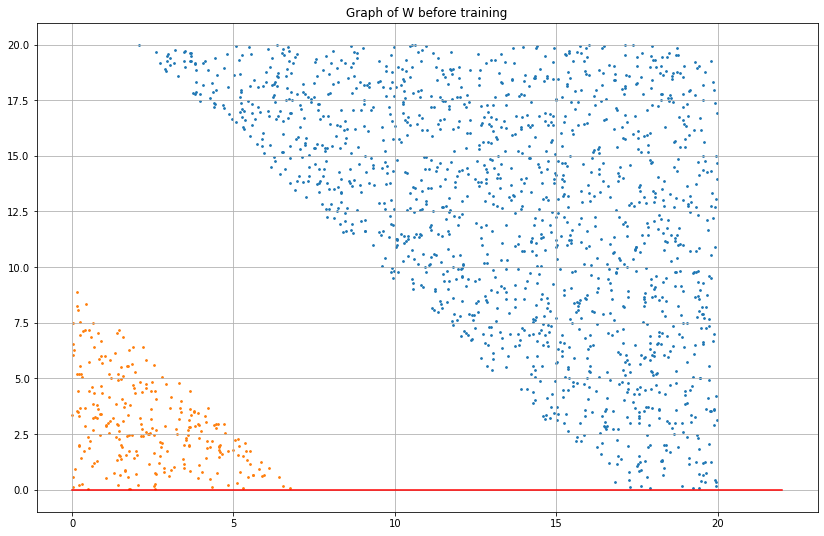

Early stopping at epoch number %d 1


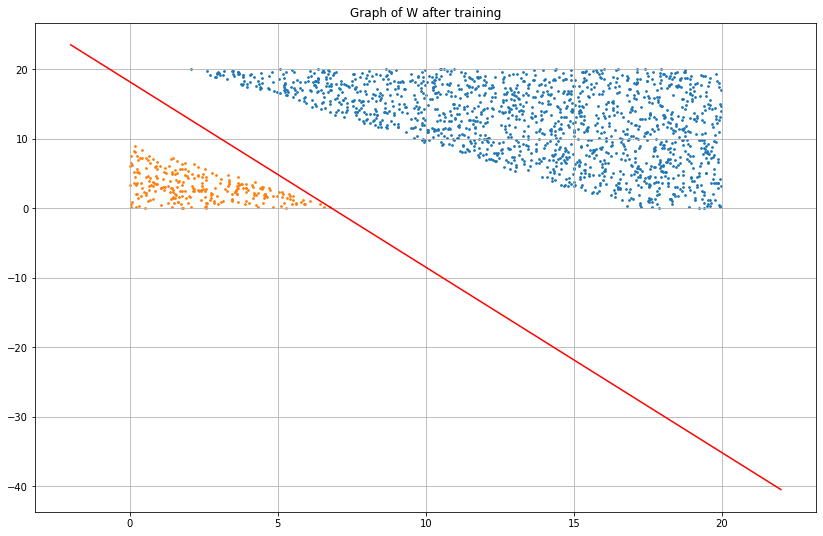

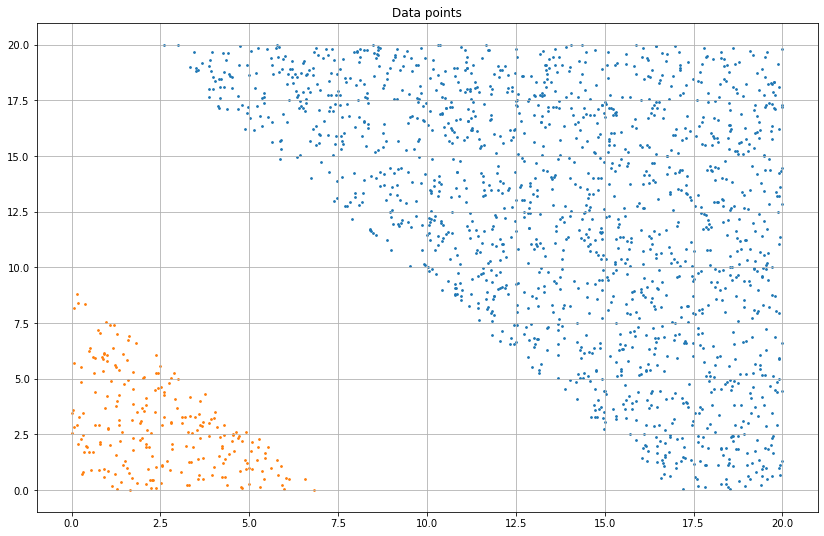

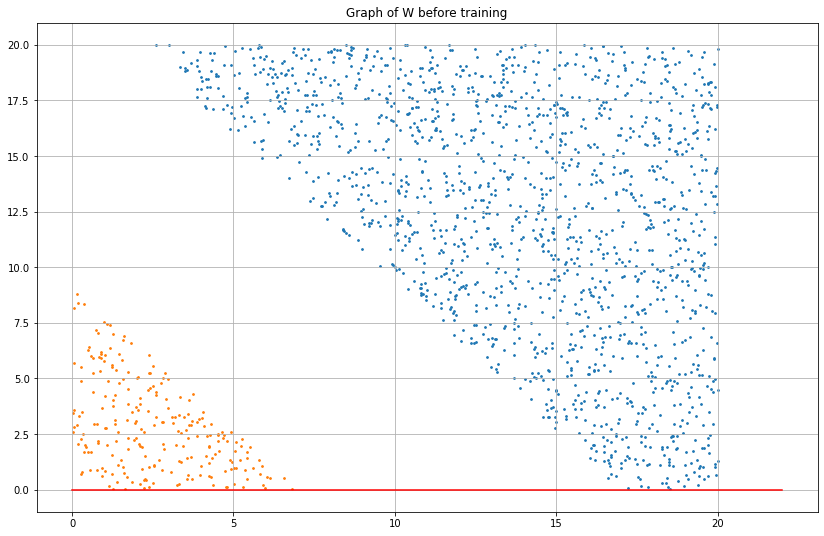

Early stopping at epoch number %d 1


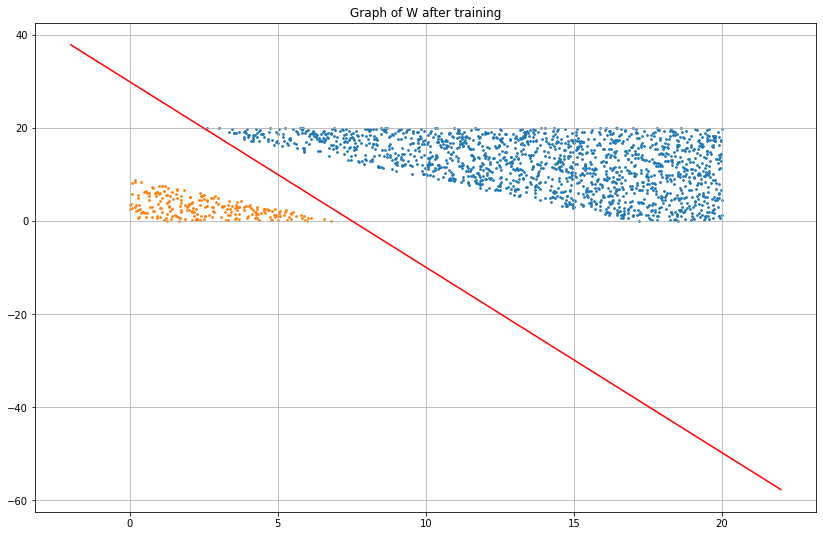

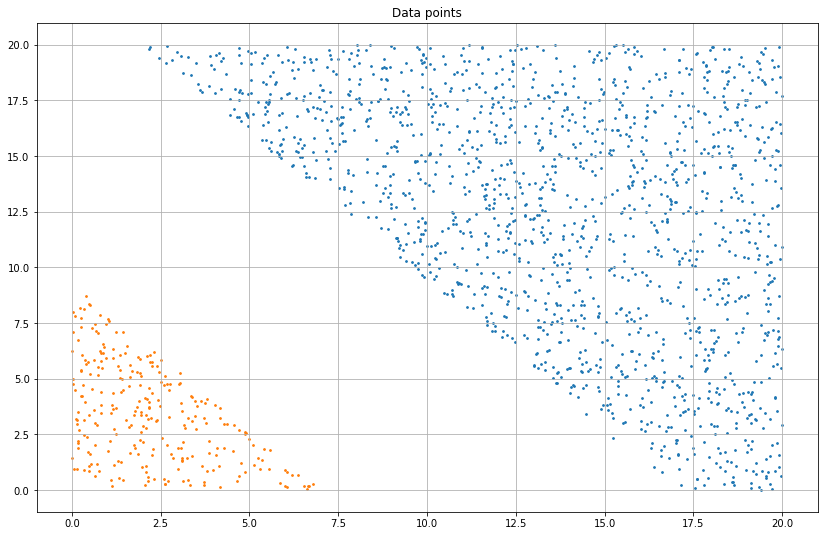

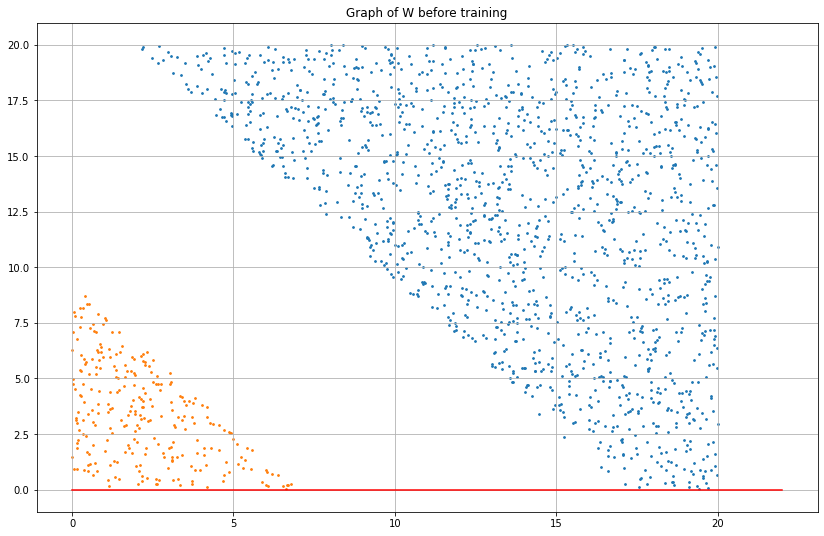

Early stopping at epoch number %d 1


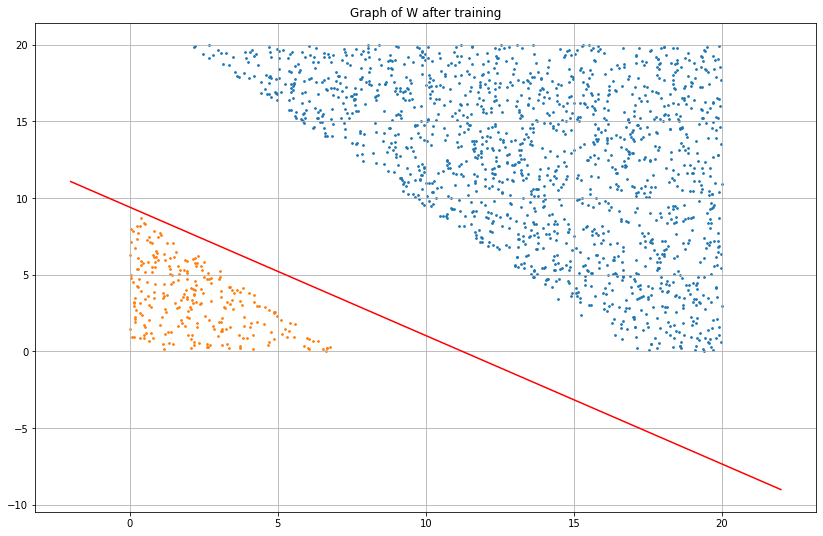

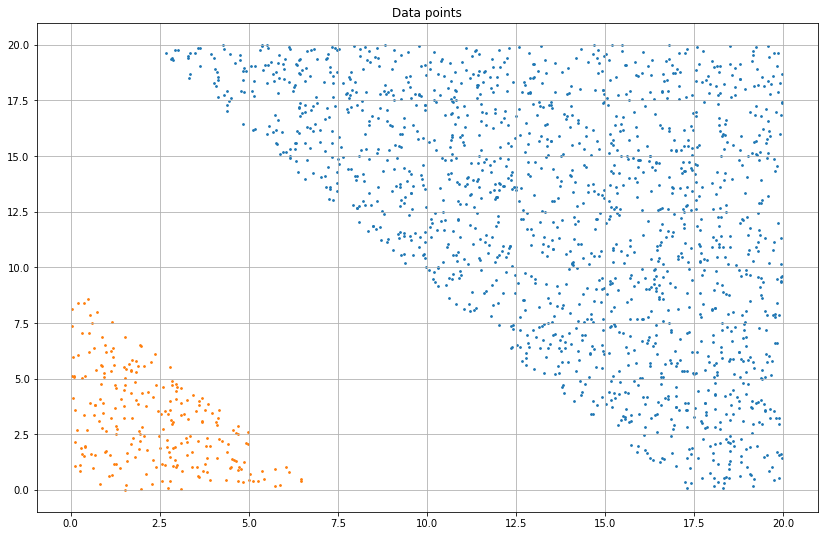

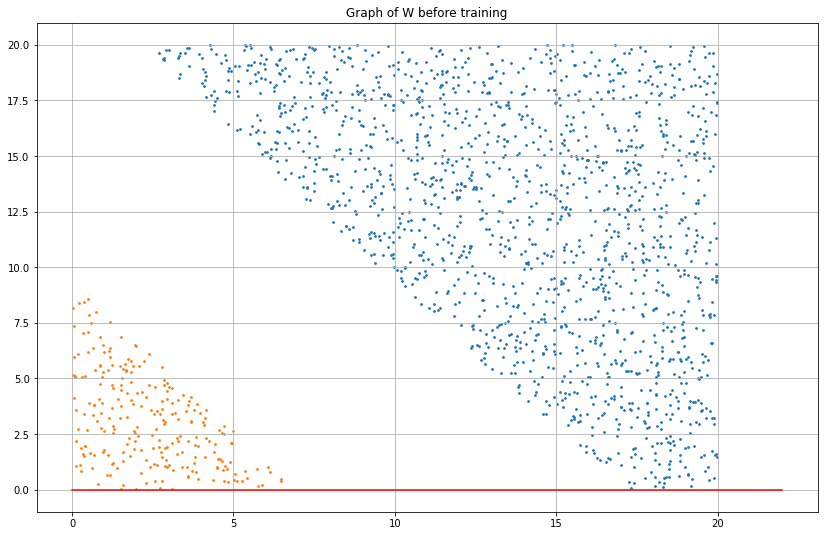

Early stopping at epoch number %d 1


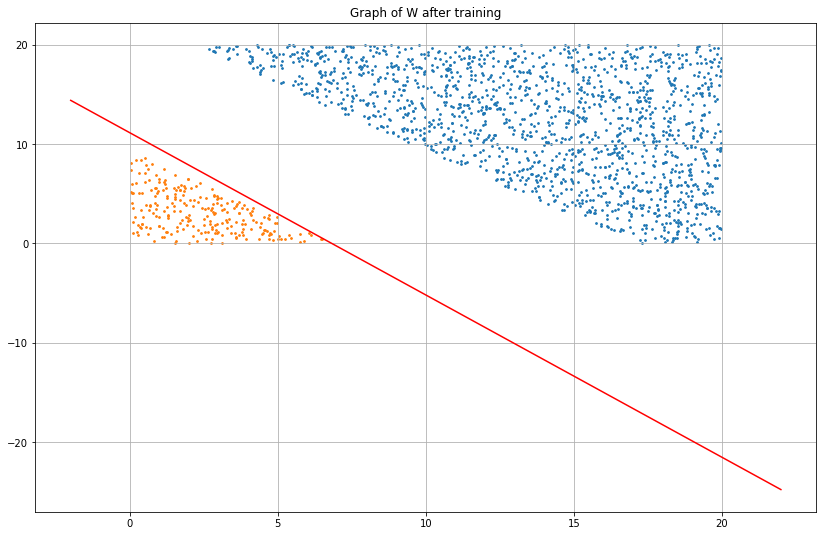

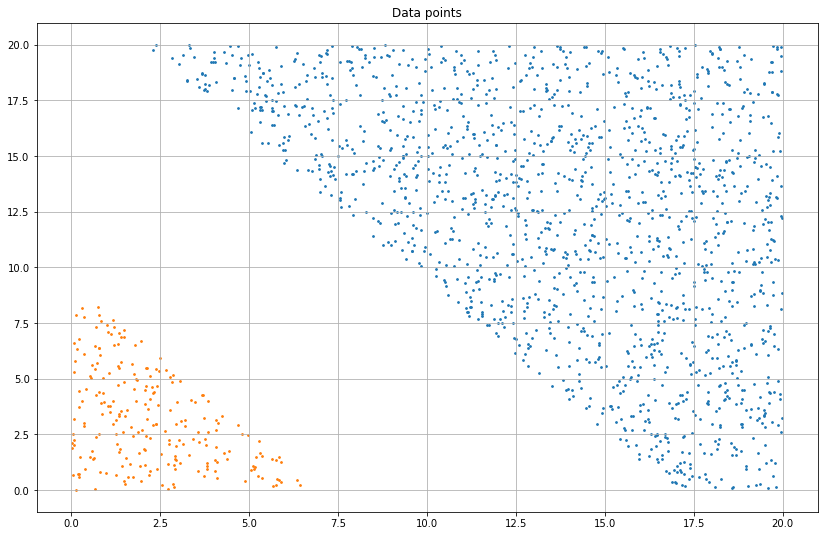

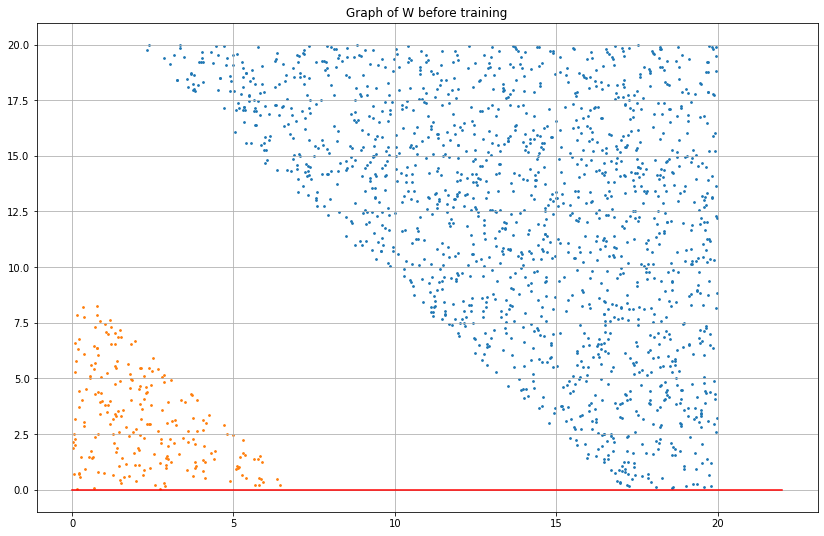

Early stopping at epoch number %d 1


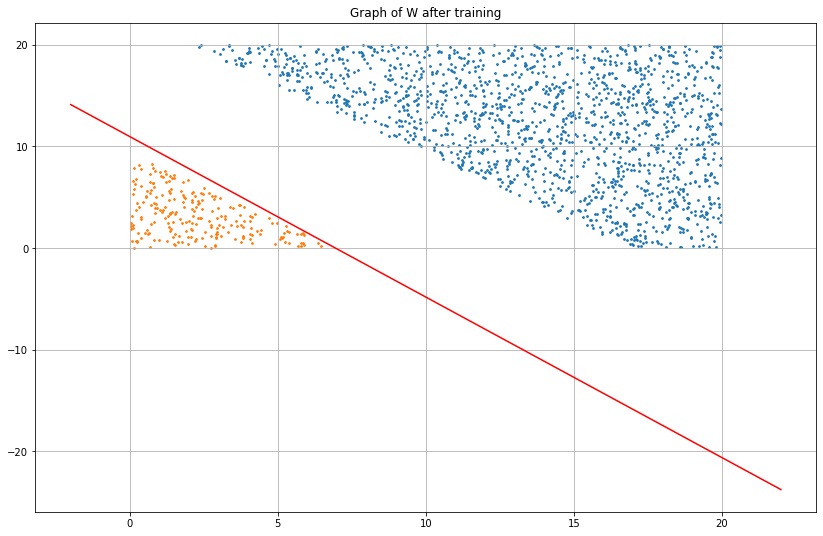

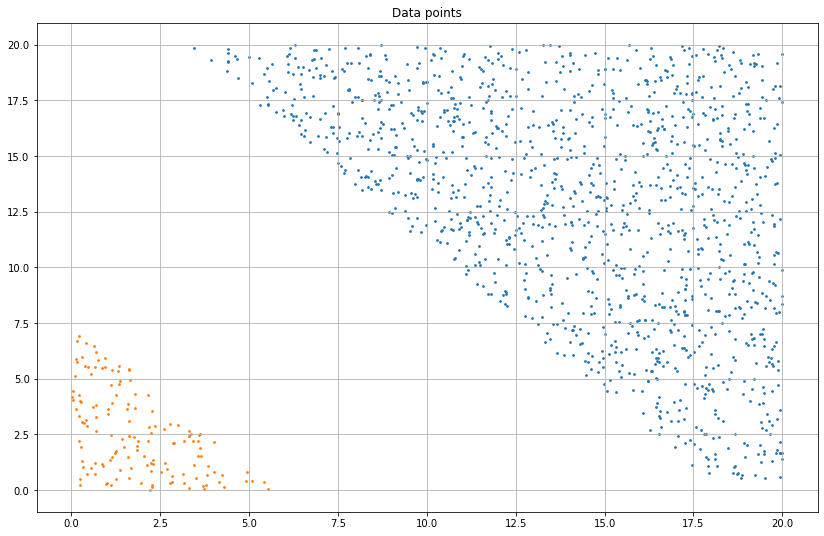

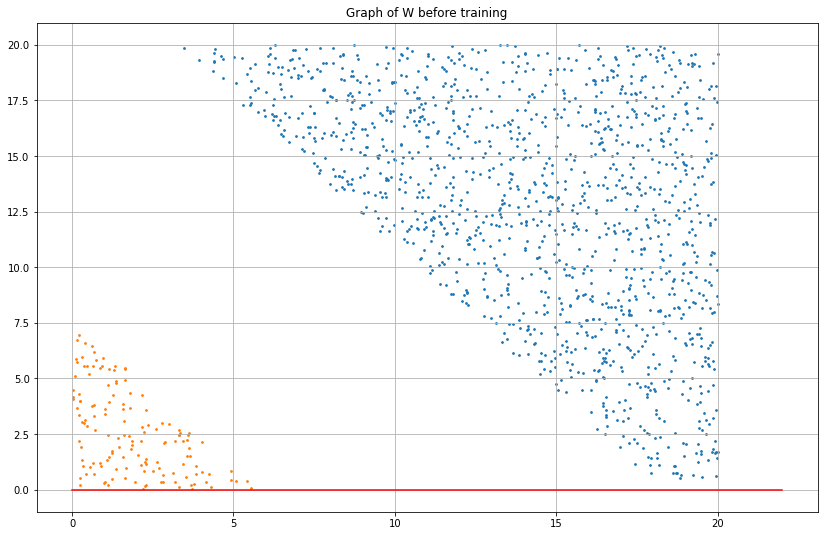

Early stopping at epoch number %d 1


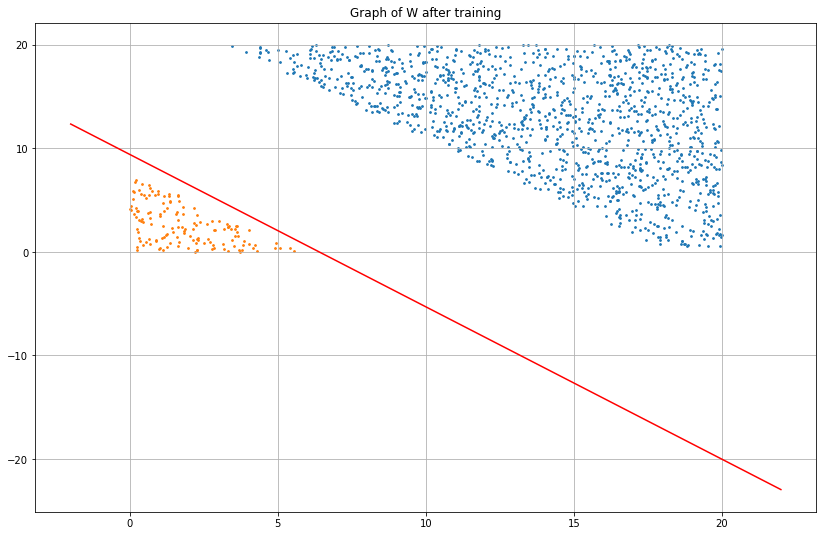

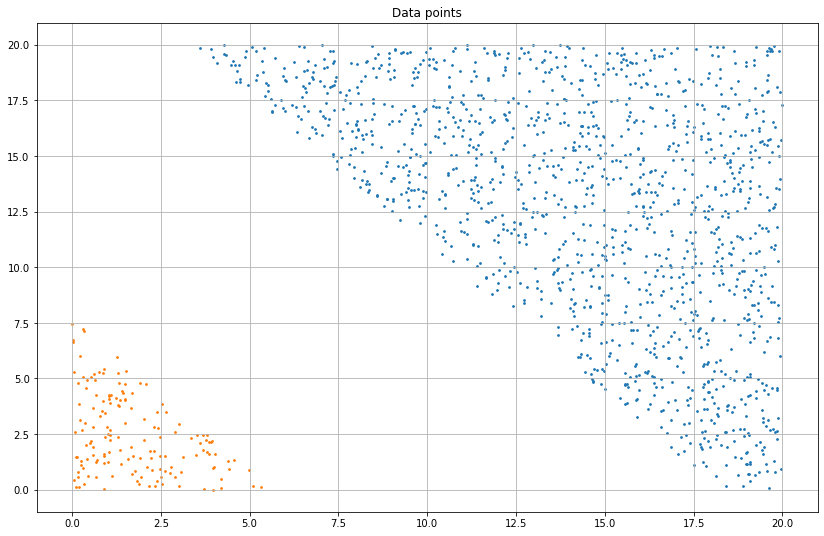

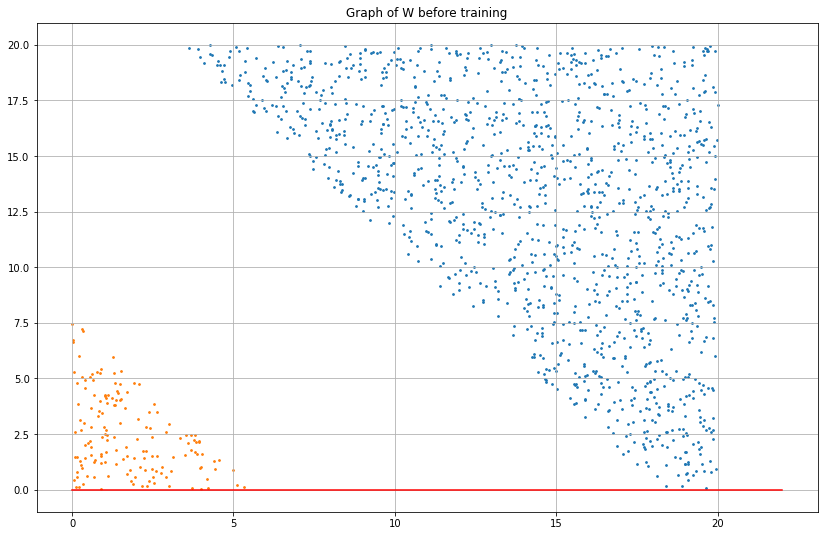

Early stopping at epoch number %d 1


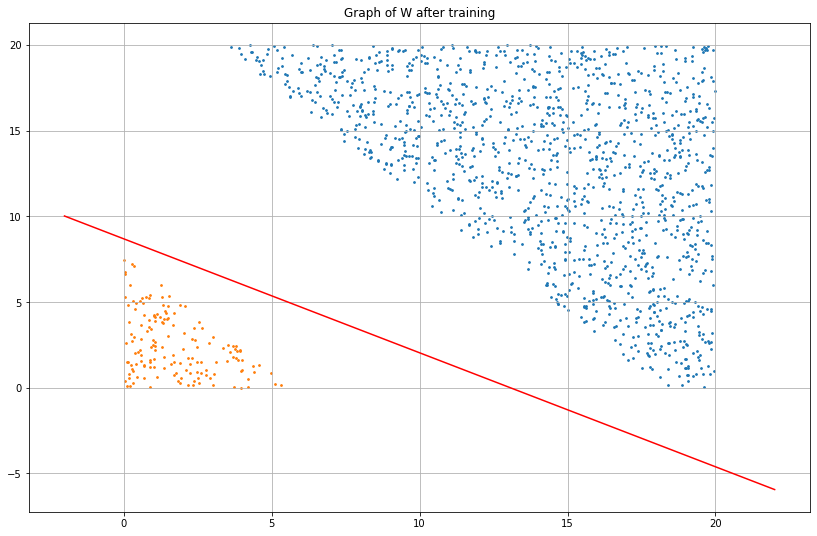

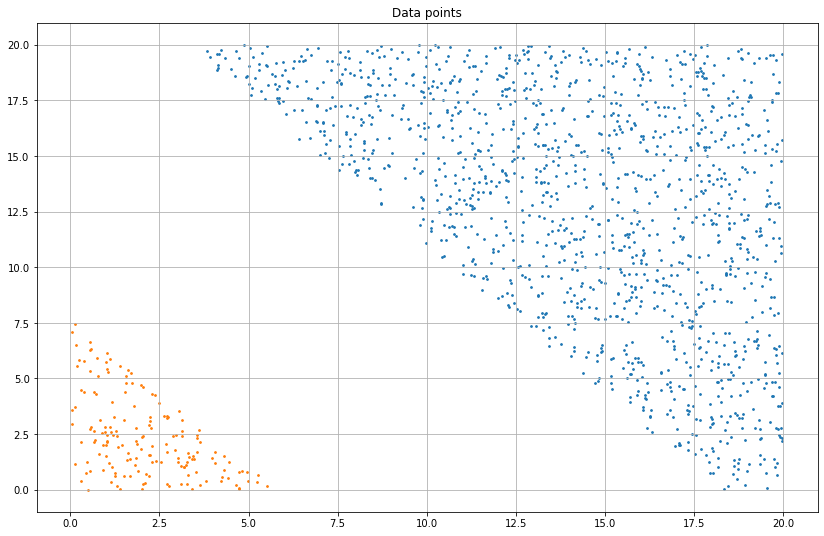

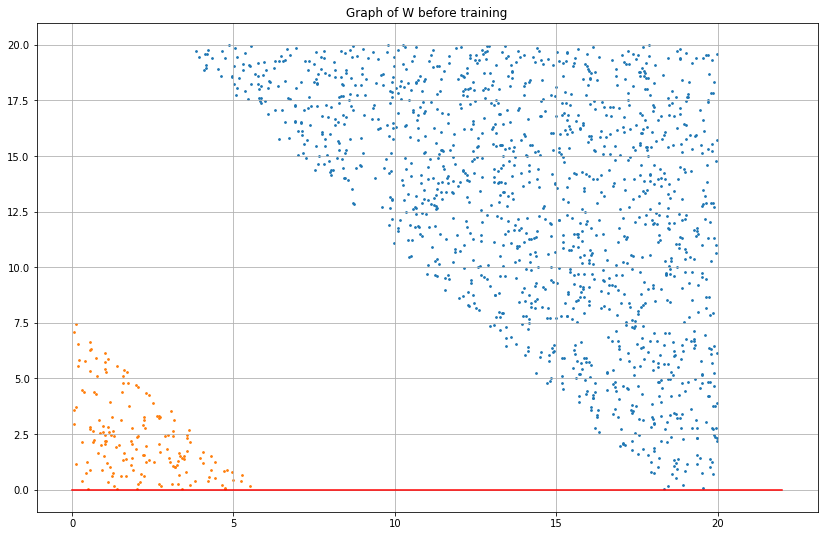

Early stopping at epoch number %d 1


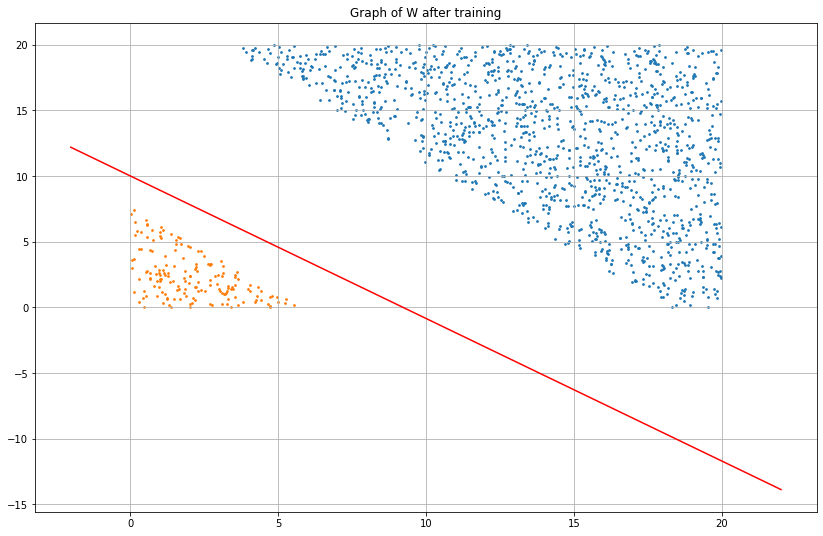

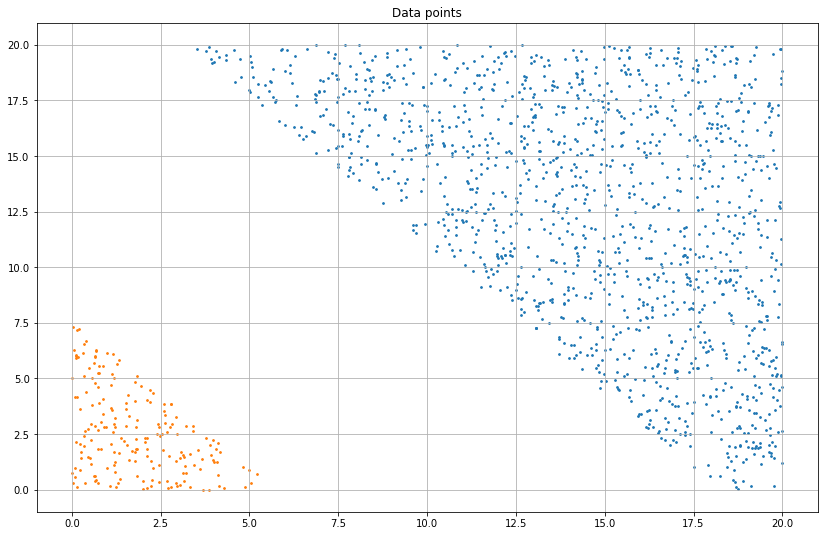

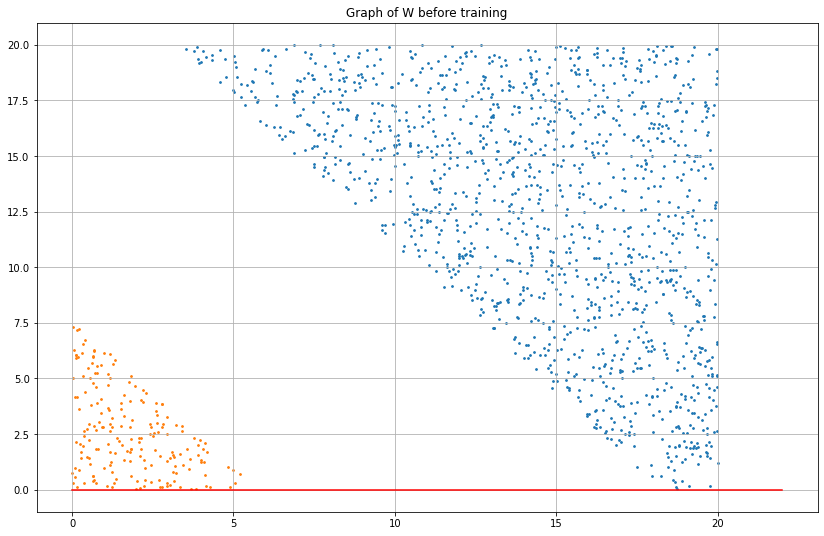

Early stopping at epoch number %d 1


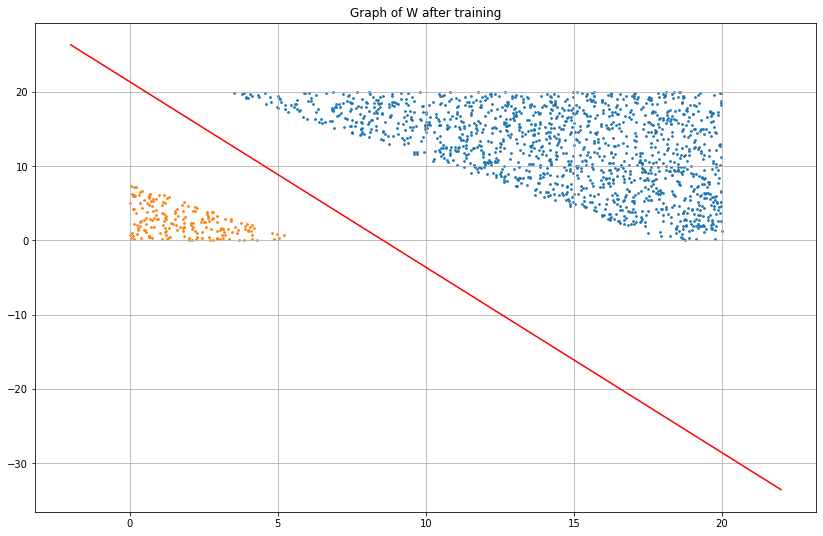

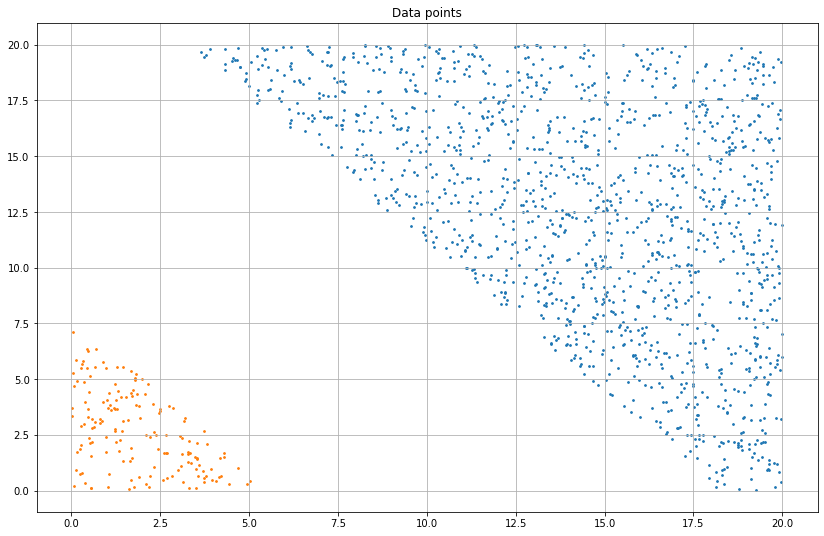

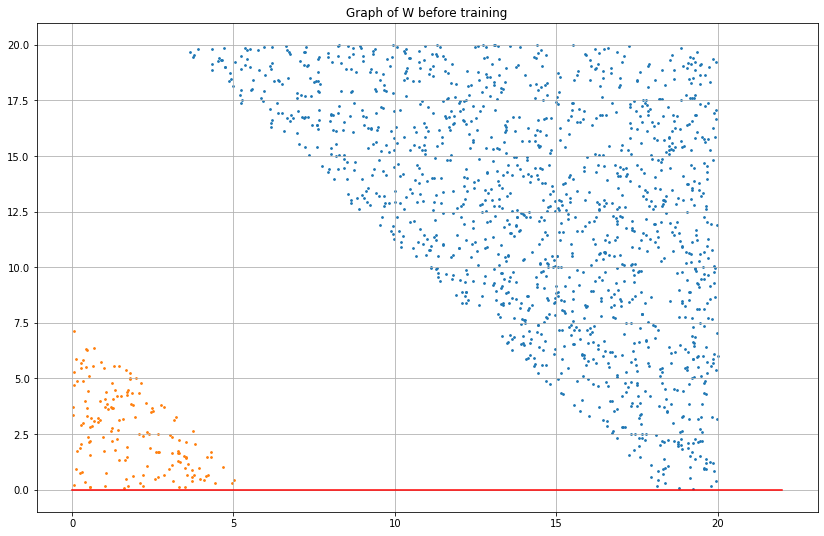

Early stopping at epoch number %d 1


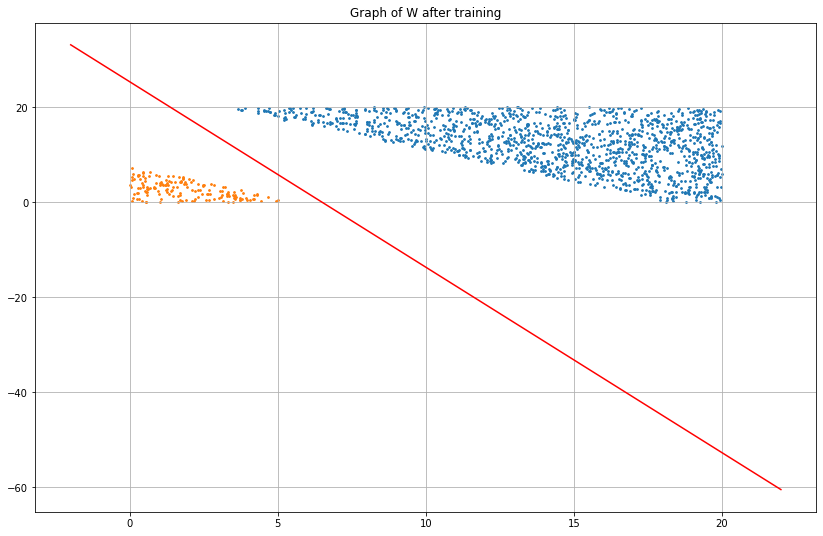

[1399.8, 715.4, 492.6, 302.4, 190.4, 50.2, 51.6]


In [7]:
n_updates_avg = [] #average of iterations for gamma's taken
x = np.linspace(-2,22,100)
gamma = torch.tensor([0.1,0.25,0.5,1,2,4,5])
#finding avg of iterations of taken for each gamma
for i in range(gamma.size(0)):
    j = 0
    summ = 0
    while(j<5):
        X,Y,W=create_data(gamma[i])
        W,n_updates = train_perceptron(X,Y, W, 100,0) #training perceptron
        y = -(W[0]/W[1])*x - (W[2]/W[1])
        plot_f(X,Y,'Graph of W after training',x,y)
        summ = summ+n_updates
        j = j + 1
    n_updates_avg.append(summ/5)
print(n_updates_avg)

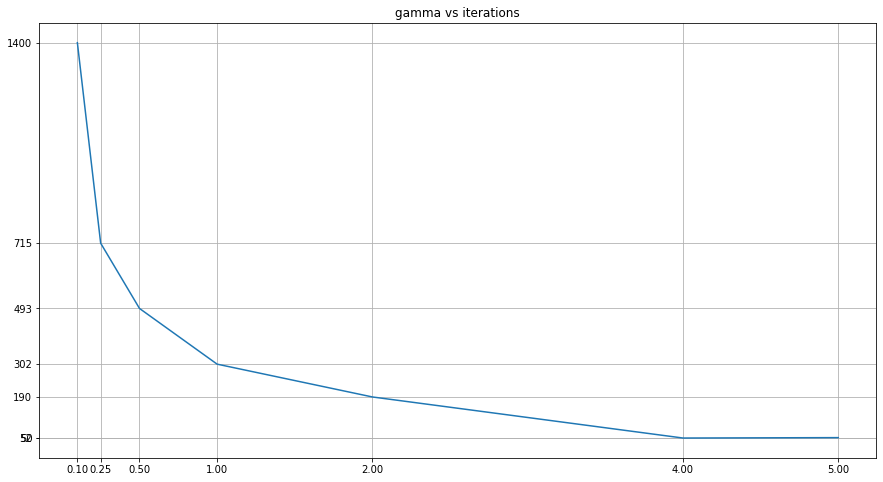

In [8]:
plt.figure(figsize = (15,8))
plt.plot(gamma,n_updates_avg)
plt.xticks(gamma)
plt.yticks(n_updates_avg)
plt.grid()
plt.title("gamma vs iterations")
plt.show()